<a href="https://colab.research.google.com/github/thc1006/FLORA/blob/main/0630_FLORA_DP_L4_client_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Cell 1: Áí∞Â¢ÉË®≠ÂÆöËàáÂáΩÂºèÂ∫´ÂåØÂÖ•Ôºà‰øÆÊ≠£ÁâàÔºâ
!pip install --upgrade opacus -q

import torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np, pandas as pd, random, copy, json, os, time, warnings, math, re, contextlib
from collections import deque
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt, seaborn as sns
from dataclasses import dataclass, asdict
from sklearn.cluster import KMeans
from opacus import PrivacyEngine
from opacus.validators import ModuleValidator
from opacus.data_loader import DPDataLoader

# --- Áí∞Â¢ÉË®≠ÂÆö ---
try: torch._dynamo.disable()
except Exception: pass
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.filterwarnings("ignore", message=".*overflow encountered.*", category=RuntimeWarning)

pd.options.mode.chained_assignment = None

print("‚úÖ Cell 1: Áí∞Â¢ÉËàáÂáΩÂºèÂ∫´Ê∫ñÂÇôÂ∞±Á∑í„ÄÇ")
import opacus
print(f"PyTorch/Opacus ÁâàÊú¨: {torch.__version__} / {opacus.__version__}")
print(f"CUDA ÊòØÂê¶ÂèØÁî®: {torch.cuda.is_available()}")


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 254.4/254.4 kB 10.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 34.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 48.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 25.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [2]:
# @title Cell 2: üéì ÂØ¶È©óÂèÉÊï∏Ë®≠ÂÆöÔºàÊúÄÁµÇÈ©óË≠âÁâàÔºâ
@dataclass
class TrainingConfig:
    experiment_name: str; output_dir: str
    mode: str = "ClusteredFL"
    random_seed: int = 42
    comm_rounds: int = 20
    client_pairs: tuple = ((1, 2), (3, 7), (5, 6))
    num_clients: int = 3
    num_clients_to_select: int = 3

    # L4 GPU ÊÄßËÉΩËàáDPÁ©©ÂÆöÊÄßÂπ≥Ë°°ÁöÑÂèÉÊï∏
    local_episodes_per_round: int = 6
    steps_per_episode: int = 300
    batch_size: int = 64                   # <-- ‰øùÊåÅÂ§ßÊâπÊ¨°‰ª•Âà©Áî®GPU
    gamma: float = 0.99

    # Â≠∏ÁøíÂèÉÊï∏
    lr: float = 1e-4
    target_update_freq: int = 15

    # RL Êé¢Á¥¢ÂèÉÊï∏
    epsilon_start: float = 1.0; epsilon_decay: float = 0.9995; epsilon_min: float = 0.05

    # Ë®òÊÜ∂ËàáÂõûÊîæÔºàL4ÊÄßËÉΩÂÑ™ÂåñÔºâ
    memory_capacity: int = 50000           # <-- ‰øùÊåÅÂ§ßÂÆπÈáè
    replay_start_size: int = 1000
    replay_frequency: int = 2
    replay_batches_per_call: int = 2

    # ËÅØÈÇ¶Â≠∏ÁøíÁ≠ñÁï•ÂèÉÊï∏
    fedprox_mu: float = 0.01
    num_clusters: int = 2
    cluster_update_freq: int = 15

    # Â∑ÆÂàÜÈö±ÁßÅÂèÉÊï∏ÔºàRDPÊúÉË®àÂô®Á©©ÂÆöÈÖçÁΩÆÔºâ
    enable_dp: bool = True
    dp_target_epsilon: float = 8.0         # <-- ‰ΩøÁî®‰∏ÄÂÄãÊõ¥ÁÇ∫Ê®ôÊ∫ñÁöÑÈö±ÁßÅÈ†êÁÆó
    dp_target_delta: float = 1e-5          # <-- Ê®ôÊ∫ñÁöÑdeltaÂÄº
    dp_max_grad_norm: float = 1.0
    dp_noise_multiplier: float = 0.7       # <-- Á©©ÂÆöÁöÑÂô™ËÅ≤‰πòÊï∏
    dp_sampling_probability: float = 0.05
    dp_virtual_batch_size: int = 64
    dp_microbatch_size: int = 1

    # ÂäüËÉΩÈñãÈóú
    enable_heterogeneity: bool = True
    enable_compression: bool = True

    # Á≥ªÁµ±Ë®≠ÂÆö
    straggler_ratio: float = 0.1; dropout_ratio: float = 0.05
    compression_type: str = "quantize_fp16"
    use_pfl_finetune: bool = True; local_finetune_episodes: int = 15
    device: str = "cuda" if torch.cuda.is_available() else "cpu"
    reset_to_random_start: bool = True

    def __post_init__(self):
        if torch.cuda.is_available():
            if "L4" in torch.cuda.get_device_name(0):
                print(f"üöÄ L4 GPUÊ™¢Ê∏¨Âà∞ÔºåÂïüÁî®DPÊÄßËÉΩÂÑ™ÂåñÈÖçÁΩÆ")

        if self.mode == 'Centralized':
            self.enable_dp = False

        if self.enable_dp and self.mode != 'Centralized':
            print(f"üõ°Ô∏è Â∑ÆÂàÜÈö±ÁßÅÂ∑≤ÂïüÁî®ÔºàRDPÊúÉË®àÂô®Á©©ÂÆöÈÖçÁΩÆÔºâ")
        else:
            print(f"üõ°Ô∏è Â∑ÆÂàÜÈö±ÁßÅÔºöÁ¶ÅÁî®ÔºàÊ®°Âºè: {self.mode}Ôºâ")

    def save(self):
        os.makedirs(self.output_dir, exist_ok=True)
        path = os.path.join(self.output_dir, f'{self.experiment_name}_config.json')
        config_dict = {k: (list(v) if isinstance(v, tuple) else v) for k, v in asdict(self).items()}
        with open(path, 'w') as f: json.dump(config_dict, f, indent=4)

print("‚úÖ Cell 2: TrainingConfigÔºàÊúÄÁµÇÈ©óË≠âÁâàÔºâÂÆöÁæ©ÂÆåÊàê„ÄÇ")


‚úÖ Cell 2: TrainingConfigÔºàÊúÄÁµÇÈ©óË≠âÁâàÔºâÂÆöÁæ©ÂÆåÊàê„ÄÇ


In [3]:
# @title Cell 3: üß© Êï∏ÊìöËàáÁí∞Â¢ÉÊ∫ñÂÇôÔºà‰øÆÊ≠£ÁâàÔºâ
class DataManager:
    def __init__(self, data_path, client_pairs_config):
        print(f"\n[DataManager] Ê≠£Âú®Âæû {data_path} ËÆÄÂèñÊï∏Êìö...")
        self.df_kpi = pd.read_parquet(data_path)
        self.client_pairs_config = client_pairs_config
        self._sanitize_column_names(); self._preflight_check()

    def _sanitize_column_names(self):
        sanitized_columns = [re.sub(r'[\[\]\(\)%\s\.-]+', '_', col.strip().lower()).strip('_')
                           for col in self.df_kpi.columns]
        self.df_kpi.columns = sanitized_columns

    def _preflight_check(self):
        print("\n" + "="*20 + " DataManager ÂïüÂãïÂâçÈ†êÊ™¢Êü• " + "="*20)
        cols = self.df_kpi.columns.tolist()
        tput_cand = ['throughput_dl_mbps', 'tx_brate_downlink_mbps']
        lat_cand = ['buffer_occupancy_dl_bytes', 'dl_buffer_bytes']

        self.tput_col = next((c for c in tput_cand if c in cols), None)
        self.lat_col = next((c for c in lat_cand if c in cols), None)

        print(f"‚úÖ Ê∏ÖÁêÜÂæåÁöÑÊ¨Ñ‰ΩçÂàóË°® (ÂÖ± {len(cols)} ÂÄã):")
        print(f"   - ÂêûÂêêÈáèÊ¨Ñ‰ΩçÊàêÂäüÂåπÈÖç: '{self.tput_col}'" if self.tput_col
              else "   - ÂêûÂêêÈáèÊ¨Ñ‰ΩçÂåπÈÖçÂ§±ÊïóÔºÅ")
        print(f"   - Âª∂ÈÅ≤/Á∑©Ë°ùÂçÄÊ¨Ñ‰ΩçÊàêÂäüÂåπÈÖç: '{self.lat_col}'" if self.lat_col
              else "   - Âª∂ÈÅ≤/Á∑©Ë°ùÂçÄÊ¨Ñ‰ΩçÂåπÈÖçÂ§±ÊïóÔºÅ")

        # ‰øÆÊ≠£ÔºöÊ™¢Êü•BSÁØÄÈªûÁöÑÂØ¶ÈöõÂèØÁî®ÊÄß
        available_bs = sorted(self.df_kpi['bs_id'].unique())
        print(f"   - ÂèØÁî®BSÁØÄÈªû: {available_bs}")

        # È©óË≠âÂÆ¢Êà∂Á´ØÈÖçÂ∞çÁöÑÊúâÊïàÊÄß
        for i, (embb_bs, urllc_bs) in enumerate(self.client_pairs_config):
            if embb_bs not in available_bs or urllc_bs not in available_bs:
                raise ValueError(f"ÂÆ¢Êà∂Á´Ø {i} ÁöÑBSÈÖçÂ∞ç ({embb_bs}, {urllc_bs}) ‰∏≠ÂåÖÂê´‰∏çÂ≠òÂú®ÁöÑBSÁØÄÈªû")
        print("   - ÂÆ¢Êà∂Á´ØBSÈÖçÂ∞çÈ©óË≠âÈÄöÈÅé")
        print("="*65 + "\n")

        if not (self.tput_col and self.lat_col):
            raise ValueError("È†êÊ™¢Êü•Â§±Êïó: Êâæ‰∏çÂà∞ÂøÖË¶ÅÁöÑÊï∏ÊìöÊ¨Ñ‰Ωç„ÄÇ")

    def _get_clean_df(self, gnb_id, slice_id):
        """‰øÆÊ≠£ÁâàÔºöÂ¢ûÂä†Êõ¥Âö¥Ê†ºÁöÑÊï∏ÊìöÈÅéÊøæÂíåÈ©óË≠â"""
        df, bs_col, sl_col = self.df_kpi, 'bs_id', 'slice_id'

        # Á¢∫‰øùÊï∏ÊìöÈ°ûÂûã‰∏ÄËá¥ÊÄß
        mask = (df[bs_col].astype(int) == int(gnb_id)) & (df[sl_col].astype(int) == int(slice_id))
        subset = df.loc[mask, ['timestamp', self.tput_col, self.lat_col]].copy()

        # ‰øÆÊ≠£ÔºöÊõ¥Âö¥Ê†ºÁöÑÊï∏ÊìöÊ∏ÖÁêÜ
        subset = subset.rename(columns={self.tput_col: 'throughput', self.lat_col: 'latency'})
        subset = subset.dropna()

        # ÁßªÈô§Áï∞Â∏∏ÂÄºÔºàË∂ÖÂá∫ÂêàÁêÜÁØÑÂúçÁöÑÊï∏ÊìöÈªûÔºâ
        if not subset.empty:
            subset = subset[
                (subset['throughput'] >= 0) & (subset['throughput'] <= 1000) &  # ÂêûÂêêÈáèÁØÑÂúç
                (subset['latency'] >= 0) & (subset['latency'] <= 1e9)  # Âª∂ÈÅ≤ÁØÑÂúç
            ]

        return subset

    def get_client_trajectories(self):
        """‰øÆÊ≠£ÁâàÔºöÁ¢∫‰øùÂÆ¢Êà∂Á´ØÊï∏ÊìöÂÆåÂÖ®Áç®Á´ã"""
        client_trajectories = {}
        print("[DataManager] Ê≠£Âú®ÁÇ∫ÊØèÂÄãÂÆ¢Êà∂Á´ØÁîüÊàêÊï∏ÊìöËªåË∑°...")

        for i, (embb_id, urllc_id) in enumerate(tqdm(self.client_pairs_config, desc="ËôïÁêÜÂÆ¢Êà∂Á´ØÊï∏Êìö")):
            try:
                # Á¢∫‰øùÊØèÂÄãÂÆ¢Êà∂Á´Ø‰ΩøÁî®‰∏çÂêåÁöÑBSÔºåÁ∂≠Ë≠∑Êï∏ÊìöÁç®Á´ãÊÄß
                df_embb = self._get_clean_df(embb_id, 0)  # eMBBÂàáÁâá
                df_urllc = self._get_clean_df(urllc_id, 2)  # URLLCÂàáÁâá

                if df_embb.empty or df_urllc.empty:
                    print(f"üü° Ë≠¶Âëä: ÂÆ¢Êà∂Á´Ø {i} (BS {embb_id}/{urllc_id}) ÁØ©ÈÅ∏ÂæåÁÑ°ÊúâÊïàÊï∏Êìö„ÄÇ")
                    client_trajectories[i] = np.array([])
                    continue

                # ‰øÆÊ≠£Ôºö‰ΩøÁî®Êõ¥‰øùÂÆàÁöÑÊôÇÈñìÂÆπÂøçÂ∫¶ÔºåÈÅøÂÖçÊï∏ÊìöÊ¥©Êºè
                merged_df = pd.merge_asof(
                    df_embb.sort_values('timestamp'),
                    df_urllc.sort_values('timestamp'),
                    on='timestamp',
                    direction='backward',  # Á¢∫‰øùÂè™‰ΩøÁî®ÈÅéÂéªÁöÑ‰ø°ÊÅØ
                    tolerance=pd.Timedelta('100ms'),  # Ê∏õÂ∞ëÂÆπÂøçÂ∫¶
                    suffixes=('_embb', '_urllc')
                ).dropna()

                if merged_df.empty:
                    print(f"üü° Ë≠¶Âëä: ÂÆ¢Êà∂Á´Ø {i} Âêà‰ΩµÂæåÁÑ°ÊúâÊïàÊï∏Êìö„ÄÇ")
                    client_trajectories[i] = np.array([])
                    continue

                # Á¢∫‰øùÊï∏ÊìöÂ∫èÂàóÁöÑÊôÇÈñìÈ†ÜÂ∫èÊÄß
                merged_df = merged_df.sort_values('timestamp').reset_index(drop=True)
                trajectory = merged_df[['throughput_embb', 'latency_embb',
                                      'throughput_urllc', 'latency_urllc']].to_numpy(dtype=np.float32)

                client_trajectories[i] = trajectory
                print(f"   - ÂÆ¢Êà∂Á´Ø {i}: {len(trajectory)} ÂÄãÊôÇÈñìÊ≠•")

            except Exception as e:
                print(f"‚ùå ÈåØË™§: ËôïÁêÜÂÆ¢Êà∂Á´Ø {i} ÊôÇÁôºÁîüÂö¥ÈáçÈåØË™§: {e}")
                client_trajectories[i] = np.array([])

        num_valid = sum(1 for traj in client_trajectories.values() if traj.size > 0)
        print(f"\n[DataManager] Êï∏ÊìöËôïÁêÜÂÆåÊàêÔºÅÊàêÂäüÁÇ∫ {num_valid} / {len(self.client_pairs_config)} ÂÄãÂÆ¢Êà∂Á´ØÂâµÂª∫‰∫ÜÁí∞Â¢É„ÄÇ")
        return client_trajectories

print("‚úÖ Cell 3: DataManagerÔºà‰øÆÊ≠£ÁâàÔºâÂÆöÁæ©ÂÆåÊàê„ÄÇ")


‚úÖ Cell 3: DataManagerÔºà‰øÆÊ≠£ÁâàÔºâÂÆöÁæ©ÂÆåÊàê„ÄÇ


In [4]:
# @title Cell 4: ‚ö° RL Áí∞Â¢ÉËàáÊï∏ÊìöËôïÁêÜÔºàÊï¥ÂêàGPUË®≠ÂÆöÔºâ
import gc
import time
import os
import torch
import numpy as np
import pandas as pd
from collections import deque
from torch.utils.data import Dataset, DataLoader

class PairedEnv:
    # ... PairedEnv È°ûÂà•ÁöÑÁ®ãÂºèÁ¢º‰øùÊåÅ‰∏çËÆä ...
    def __init__(self, trajectory, config: TrainingConfig):
        self.trajectory, self.config = trajectory, config
        self.state_size = trajectory.shape[1] if trajectory.size > 0 else 4
        self.action_size = 3; self.cursor = 0; self.reset()

    def reset(self):
        if self.trajectory.size == 0: return np.zeros(self.state_size, dtype=np.float32)
        max_start = max(0, len(self.trajectory) - self.config.steps_per_episode)
        if self.config.reset_to_random_start and max_start > 0: self.cursor = np.random.randint(0, max_start)
        else: self.cursor = 0
        return self.trajectory[self.cursor]

    def step(self, action_id: int):
        if self.trajectory.size == 0 or self.cursor >= len(self.trajectory) - 1:
            state = self.trajectory[-1] if self.trajectory.size > 0 else np.zeros(self.state_size, dtype=np.float32)
            return state, 0.0, True, {}
        self.cursor += 1
        done = self.cursor >= len(self.trajectory) - 1
        state = self.trajectory[self.cursor]
        reward = self._compute_reward_with_action(state, action_id)
        return state, reward, done, {}

    def _compute_reward_with_action(self, state: np.ndarray, action_id: int) -> float:
        tput_embb, lat_embb, tput_urllc, lat_urllc = state
        if action_id == 0: w_tput, w_lat = (0.7, 0.3)
        elif action_id == 2: w_tput, w_lat = (0.3, 0.7)
        else: w_tput, w_lat = (0.5, 0.5)
        tput_reward = w_tput * (np.log1p(tput_embb) + 0.5 * np.log1p(tput_urllc))
        lat_penalty = w_lat * (np.tanh(lat_urllc * 1e-6) + 0.3 * np.tanh(lat_embb * 1e-6))
        reward_val = tput_reward - lat_penalty
        return float(np.nan_to_num(reward_val, nan=0.0, posinf=10.0, neginf=-10.0))

class RLDataset(Dataset):
    # ... RLDataset È°ûÂà•ÁöÑÁ®ãÂºèÁ¢º‰øùÊåÅ‰∏çËÆä ...
    def __init__(self, memory_list): self.data = memory_list[:]
    def __len__(self): return len(self.data)
    def __getitem__(self, idx):
        state, action, reward, next_state, done = self.data[idx]
        return (torch.from_numpy(state).float(), torch.tensor(action).long(),
                torch.tensor(reward).float(), torch.from_numpy(next_state).float(),
                torch.tensor(done).bool())

def get_gpu_optimized_data_loader(agent_memory: deque, batch_size: int, device: str):
    # ... get_gpu_optimized_data_loader ÂáΩÊï∏ÁöÑÁ®ãÂºèÁ¢º‰øùÊåÅ‰∏çËÆä ...
    if len(agent_memory) < batch_size: return None
    try:
        dataset = RLDataset(list(agent_memory))
        return DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True, drop_last=True)
    except Exception as e:
        print(f"üö® GPUÂÑ™ÂåñDataLoaderÂâµÂª∫Â§±Êïó: {e}")
        return None

# ==============================================================================
# ÈóúÈçµ‰øÆÊ≠£ÔºöÂ∞áÊâÄÊúâGPUË®≠ÂÆöÈÇèËºØÊï¥ÂêàÂà∞‰∏ÄÂÄãÂáΩÊï∏‰∏≠Ôºå‰∏¶ÊîæÂú®Ê≠§Ëôï
# ==============================================================================
def setup_gpu_environment():
    """Áµ±‰∏ÄÁöÑGPUÁí∞Â¢ÉË®≠ÂÆöÂáΩÊï∏ÔºåÊô∫ËÉΩÊ™¢Ê∏¨L4‰∏¶ÊáâÁî®ÊúÄ‰Ω≥Ë®≠ÂÆö"""
    if torch.cuda.is_available():
        gpu_name = torch.cuda.get_device_name(0)
        total_memory = torch.cuda.get_device_properties(0).total_memory / 1e9

        if "L4" in gpu_name:
            # L4 GPU ‰ΩøÁî®ÊÄßËÉΩÂÑ™ÂÖàÁöÑË®≠ÂÆö
            torch.cuda.set_per_process_memory_fraction(0.9) # ‰ΩøÁî®90%Ë®òÊÜ∂È´î
            print(f"üöÄ L4 GPUÊ™¢Ê∏¨Âà∞ÔºåÊÄßËÉΩÂÑ™ÂÖàË®≠ÂÆöÔºö‰ΩøÁî®90%Ë®òÊÜ∂È´î ({total_memory:.1f} GB)")
            os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:1024,expandable_segments:True"
        else:
            # ÂÖ∂‰ªñGPU‰ΩøÁî®ËºÉ‰øùÂÆàÁöÑË®≠ÂÆö
            torch.cuda.set_per_process_memory_fraction(0.8) # ‰ΩøÁî®80%Ë®òÊÜ∂È´î
            print(f"üéÆ Ê®ôÊ∫ñGPUÊ™¢Ê∏¨Âà∞Ôºå‰øùÂÆàË®≠ÂÆöÔºö‰ΩøÁî®80%Ë®òÊÜ∂È´î ({total_memory:.1f} GB)")
            os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:512,expandable_segments:True"

        torch.cuda.empty_cache()
        gc.collect()
        print(f"üßπ GPUÁí∞Â¢ÉË®≠ÂÆöÂÆåÊàê")
    else:
        print("‚ö†Ô∏è Êú™Ê™¢Ê∏¨Âà∞GPUÔºåÂ∞á‰ΩøÁî®CPUÊ®°ÂºèÈÅãË°å„ÄÇ")

print("‚úÖ Cell 4: RLÁí∞Â¢ÉËàáÊï∏ÊìöËôïÁêÜÔºàÊï¥ÂêàGPUË®≠ÂÆöÔºâÂÆöÁæ©ÂÆåÊàê„ÄÇ")


‚úÖ Cell 4: RLÁí∞Â¢ÉËàáÊï∏ÊìöËôïÁêÜÔºàÊï¥ÂêàGPUË®≠ÂÆöÔºâÂÆöÁæ©ÂÆåÊàê„ÄÇ


In [5]:
# @title Cell 5: üõ°Ô∏è Ê†∏ÂøÉÂ≠∏Áøí‰ª£ÁêÜÔºàÂ∑ÆÂàÜÈö±ÁßÅÊúÄÁµÇÈ©óË≠âÁâàÔºâ
import gc
import time
from opacus import PrivacyEngine
from opacus.accountants import RDPAccountant # <-- ÊòéÁ¢∫Â∞éÂÖ•RDPÊúÉË®àÂô®
from opacus.validators import ModuleValidator

class RLAgent:
    def __init__(self, state_size: int, action_size: int, config: TrainingConfig, client_id: int,
                 dataset_size: int, is_eval_agent: bool = False):
        self.state_size, self.action_size, self.config = state_size, action_size, config
        self.client_id, self.dataset_size = client_id, dataset_size
        self.device = torch.device(config.device)
        self.mu = self.config.fedprox_mu
        self.gamma, self.epsilon = config.gamma, config.epsilon_start
        self.memory = deque(maxlen=config.memory_capacity)
        self.global_params = None
        self.is_eval_agent = is_eval_agent
        self.privacy_engine = None
        self.dp_steps = 0
        self.current_epsilon = 0.0
        self.consecutive_errors = 0
        self.max_consecutive_errors = 5

        self.model = self._build_dp_model()
        self.target_model = self._build_dp_model()
        self.update_target_model()
        self.target_model.eval()

        self.optimizer = optim.Adam(self.model.parameters(), lr=config.lr)
        self.criterion = nn.MSELoss()

        if self.config.enable_dp and not self.is_eval_agent and self.config.mode != 'Centralized':
            self._initialize_dp_engine()
        else:
            print(f"[C-{self.client_id}] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ")

    def _build_dp_model(self):
        model = nn.Sequential(
            nn.Linear(self.state_size, 128), nn.ReLU(),
            nn.Linear(128, 64), nn.ReLU(),
            nn.Linear(64, self.action_size)
        ).to(self.device)
        if self.config.enable_dp and not self.is_eval_agent:
            if not ModuleValidator.is_valid(model):
                model = ModuleValidator.fix(model)
        return model

    def _initialize_dp_engine(self):
        """ÊúÄÁµÇÈ©óË≠âÁâàÔºöÊòéÁ¢∫‰ΩøÁî®RDPÊúÉË®àÂô®"""
        print(f"[C-{self.client_id}] üõ°Ô∏è ÂàùÂßãÂåñÂ∑ÆÂàÜÈö±ÁßÅÂºïÊìé...")
        try:
            dummy_data = []
            for _ in range(self.config.batch_size * 2):
                state = np.random.randn(self.state_size).astype(np.float32)
                action = int(np.random.randint(0, 3))
                reward = float(np.random.randn())
                next_state = np.random.randn(self.state_size).astype(np.float32)
                done = bool(np.random.choice([True, False]))
                dummy_data.append((state, action, reward, next_state, done))

            dummy_dataset = RLDataset(dummy_data)
            dummy_loader = DataLoader(
                dummy_dataset, batch_size=self.config.batch_size, num_workers=0
            )

            # ÈóúÈçµ‰øÆÊ≠£ÔºöÊòéÁ¢∫ÊåáÂÆö‰ΩøÁî®RDPÊúÉË®àÂô®
            self.privacy_engine = PrivacyEngine(accountant="rdp")

            self.model, self.optimizer, dummy_loader = self.privacy_engine.make_private(
                module=self.model,
                optimizer=self.optimizer,
                data_loader=dummy_loader,
                noise_multiplier=self.config.dp_noise_multiplier,
                max_grad_norm=self.config.dp_max_grad_norm,
                poisson_sampling=False
            )
            print(f"   - ‚úÖ Â∑ÆÂàÜÈö±ÁßÅÂºïÊìéÂàùÂßãÂåñÊàêÂäüÔºà‰ΩøÁî®RDPÊúÉË®àÂô®Ôºâ")
        except Exception as e:
            print(f"   - ‚ùå Â∑ÆÂàÜÈö±ÁßÅÂàùÂßãÂåñÂ§±Êïó: {e}")
            self.privacy_engine = None

    def replay(self, num_batches: int):
        if len(self.memory) < self.config.batch_size: return 0.0

        data_loader = get_gpu_optimized_data_loader(
            self.memory, self.config.batch_size, self.device
        )
        if data_loader is None: return 0.0

        total_loss, batches_processed = 0.0, 0
        self.model.train()

        try:
            for i, batch in enumerate(data_loader):
                if i >= num_batches: break

                self.optimizer.zero_grad()
                states, actions, rewards, next_states, dones = [item.to(self.device, non_blocking=True) for item in batch]

                current_q = self.model(states).gather(1, actions.view(-1, 1))
                with torch.no_grad():
                    max_next_q = self.target_model(next_states).max(1)[0].unsqueeze(1)
                    target_q = rewards.view(-1, 1) + (self.gamma * max_next_q * (~dones.view(-1, 1)))

                loss = self.criterion(current_q, target_q)

                if self.config.mode in ['FedProx', 'ClusteredFL'] and self.mu > 0 and self.global_params:
                    proximal_term = 0.0
                    model_params = self.model._module.parameters() if hasattr(self.model, '_module') else self.model.parameters()
                    for local_param, global_param in zip(model_params, self.global_params):
                        proximal_term += torch.sum((local_param - global_param.to(self.device))**2)
                    loss += (self.mu / 2) * proximal_term

                if not torch.isfinite(loss): continue

                loss.backward()
                self.optimizer.step()

                total_loss += loss.item()
                batches_processed += 1
                if self.privacy_engine: self.dp_steps += 1

            return total_loss / batches_processed if batches_processed > 0 else 0.0
        except Exception as e:
            print(f"[C-{self.client_id}] üö® ÂõûÊîæÈåØË™§: {e}")
            return 0.0

    def get_privacy_cost(self):
        """ÊúÄÁµÇÈ©óË≠âÁâàÔºöÂÆâÂÖ®ÁöÑÈö±ÁßÅÊàêÊú¨Áç≤Âèñ"""
        if self.privacy_engine:
            try:
                epsilon = self.privacy_engine.get_epsilon(self.config.dp_target_delta)
                # ÈóúÈçµ‰øÆÊ≠£ÔºöÊ™¢Êü•infÊàñnanÂÄº
                if np.isinf(epsilon) or np.isnan(epsilon):
                    print(f"[C-{self.client_id}] ‚ö†Ô∏è Ê™¢Ê∏¨Âà∞ÁÑ°ÊïàÁöÑepsilonÂÄº({epsilon})ÔºåËøîÂõû0")
                    return 0.0
                return epsilon
            except Exception as e:
                print(f"[C-{self.client_id}] ‚ö†Ô∏è Èö±ÁßÅÊàêÊú¨Ë®àÁÆóÂ§±Êïó: {e}")
                return 0.0
        return 0.0

    # ... ÂÖ∂È§òÊñπÊ≥ï remember, set_global_params Á≠â‰øùÊåÅ‰∏çËÆä ...
    def remember(self, *args): self.memory.append(args)
    def set_global_params(self, state_dict):
        with torch.no_grad(): self.global_params = [p.clone().detach().cpu() for p in state_dict.values()]
    def act(self, state):
        if not self.is_eval_agent and np.random.rand() <= self.epsilon: return random.randrange(self.action_size)
        with torch.no_grad(): q_values = self.model(torch.from_numpy(state).float().unsqueeze(0).to(self.device))
        return q_values.argmax().item()
    def get_clean_state_dict(self):
        return self.model._module.state_dict() if self.privacy_engine and hasattr(self.model, '_module') else self.model.state_dict()
    def update_target_model(self): self.target_model.load_state_dict(self.get_clean_state_dict())
    def get_model_weights_flat(self):
        with torch.no_grad():
            params = self.model._module.parameters() if self.privacy_engine and hasattr(self.model, '_module') else self.model.parameters()
            return torch.cat([p.view(-1) for p in params]).cpu().numpy()
    def get_model_for_upload(self):
        state_dict = self.get_clean_state_dict()
        return {k: v.half() for k, v in state_dict.items()} if self.config.enable_compression else state_dict

# ‰øùÊåÅ Cell 4 ‰∏≠ÂÆöÁæ©ÁöÑ GPU ÂÑ™ÂåñÁâà DataLoader
def get_gpu_optimized_data_loader(agent_memory: deque, batch_size: int, device: str):
    if len(agent_memory) < batch_size: return None
    try:
        dataset = RLDataset(list(agent_memory))
        return DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True, drop_last=True)
    except Exception as e:
        print(f"üö® GPUÂÑ™ÂåñDataLoaderÂâµÂª∫Â§±Êïó: {e}")
        return None

# ‰øùÊåÅ Cell 4 ‰∏≠ÂÆöÁæ©ÁöÑ RLDataset
class RLDataset(Dataset):
    def __init__(self, memory_list): self.data = memory_list[:]
    def __len__(self): return len(self.data)
    def __getitem__(self, idx):
        state, action, reward, next_state, done = self.data[idx]
        return (torch.from_numpy(state).float(), torch.tensor(action).long(), torch.tensor(reward).float(), torch.from_numpy(next_state).float(), torch.tensor(done).bool())

print("‚úÖ Cell 5: RLAgentÔºàÂ∑ÆÂàÜÈö±ÁßÅÊúÄÁµÇÈ©óË≠âÁâàÔºâÂÆöÁæ©ÂÆåÊàê„ÄÇ")


‚úÖ Cell 5: RLAgentÔºàÂ∑ÆÂàÜÈö±ÁßÅÊúÄÁµÇÈ©óË≠âÁâàÔºâÂÆöÁæ©ÂÆåÊàê„ÄÇ


In [6]:
# @title Cell 6: üì° ËÅØÈÇ¶Â≠∏Áøí‰º∫ÊúçÂô®ÔºàÂ∑ÆÂàÜÈö±ÁßÅÂ¢ûÂº∑ÁâàÔºâ
class FLServer:
    def __init__(self, config: TrainingConfig):
        self.config = config
        self.client_to_cluster = {}
        self.cluster_models = {}

        # Â∑ÆÂàÜÈö±ÁßÅÂ¢ûÂº∑ÔºöÊ∑ªÂä†Èö±ÁßÅÁõ∏ÈóúË®òÈåÑ
        self.clustering_history = []
        self.aggregation_history = []
        self.dp_enabled = config.enable_dp and config.mode != 'Centralized'

        if self.dp_enabled:
            print(f"üõ°Ô∏è FLServer: Â∑ÆÂàÜÈö±ÁßÅÊ®°ÂºèÂ∑≤ÂïüÁî®")
            print(f"   - ÁõÆÊ®ôÈö±ÁßÅÈ†êÁÆó: Œµ={config.dp_target_epsilon}")
            print(f"   - ËÅöÂêàÁ≠ñÁï•: Âä†Ê¨äÂπ≥ÂùáÔºàDPÂÖºÂÆπÔºâ")

    @torch.no_grad()
    def aggregate_weighted(self, client_updates: list[tuple[dict, int]]):
        """Â∑ÆÂàÜÈö±ÁßÅÂÖºÂÆπÁöÑÂä†Ê¨äËÅöÂêà"""
        if not client_updates:
            return None

        # Â∑ÆÂàÜÈö±ÁßÅÂ¢ûÂº∑ÔºöË®òÈåÑËÅöÂêàÁµ±Ë®à‰ø°ÊÅØ
        if self.dp_enabled:
            num_participants = len(client_updates)
            total_data_points = sum(num_points for _, num_points in client_updates)
            print(f"üîí DPËÅöÂêà: {num_participants} ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: {total_data_points}")

        # Ëß£Â£ìÁ∏ÆÊ®°ÂûãÔºàÂ¶ÇÊûúÈúÄË¶ÅÔºâ
        decompressed_updates = []
        for state_dict, num_points in client_updates:
            if (self.config.enable_compression and
                next(iter(state_dict.values())).dtype == torch.float16):
                state_dict = {k: v.float() for k, v in state_dict.items()}
            decompressed_updates.append((state_dict, num_points))

        total_data_points = sum(num_points for _, num_points in decompressed_updates)
        if total_data_points == 0:
            return copy.deepcopy(decompressed_updates[0][0])

        # Â∑ÆÂàÜÈö±ÁßÅÂÖºÂÆπÁöÑÂä†Ê¨äËÅöÂêà
        global_dict = {k: torch.zeros_like(v, device='cpu')
                      for k, v in decompressed_updates[0][0].items()}

        for state_dict, num_points in decompressed_updates:
            weight = num_points / total_data_points
            for k, v in state_dict.items():
                global_dict[k] += v.cpu() * weight

        # Â∑ÆÂàÜÈö±ÁßÅÂ¢ûÂº∑ÔºöË®òÈåÑËÅöÂêàÊ≠∑Âè≤ÔºàÁî®ÊñºÂàÜÊûêÔºâ
        if self.dp_enabled:
            self.aggregation_history.append({
                'timestamp': time.time(),
                'num_participants': len(client_updates),
                'total_data_points': total_data_points,
                'weights': [num_points / total_data_points for _, num_points in decompressed_updates]
            })

        return global_dict

    def distribute_model(self, agents: dict, global_model_state: dict):
        """Â∑ÆÂàÜÈö±ÁßÅÂÆâÂÖ®ÁöÑÊ®°ÂûãÂàÜÁôº"""
        if not global_model_state:
            return

        # Â∑ÆÂàÜÈö±ÁßÅÂ¢ûÂº∑ÔºöÊ™¢Êü•Ê®°ÂûãÁãÄÊÖãÊúâÊïàÊÄß
        if self.dp_enabled:
            # Ê™¢Êü•Ê®°ÂûãÂèÉÊï∏ÊòØÂê¶ÂåÖÂê´Áï∞Â∏∏ÂÄºÔºàÂèØËÉΩÁî±DPÂô™ËÅ≤ÂºïËµ∑Ôºâ
            param_stats = self._check_model_sanity(global_model_state)
            if param_stats['has_inf'] or param_stats['has_nan']:
                print(f"‚ö†Ô∏è DPË≠¶Âëä: Ê™¢Ê∏¨Âà∞Ê®°ÂûãÂèÉÊï∏Áï∞Â∏∏ÔºåÂèØËÉΩÁî±Â∑ÆÂàÜÈö±ÁßÅÂô™ËÅ≤ÂºïËµ∑")

        for cid, agent in agents.items():
            current_model_state = global_model_state

            # ‰ΩøÁî®Ê≠∑Âè≤ËÅöÈ°û‰ø°ÊÅØÔºåÈÅøÂÖçÊú™‰æÜ‰ø°ÊÅØÊ¥©Êºè
            if self.config.mode == 'ClusteredFL':
                cluster_id = self.client_to_cluster.get(cid)
                if cluster_id is not None and cluster_id in self.cluster_models:
                    current_model_state = self.cluster_models[cluster_id]

            # Â∑ÆÂàÜÈö±ÁßÅÂÆâÂÖ®ÁöÑÊ®°ÂûãËºâÂÖ•
            try:
                agent.model.load_state_dict(current_model_state, strict=False)
                agent.set_global_params(current_model_state)
            except Exception as e:
                print(f"‚ö†Ô∏è ÂÆ¢Êà∂Á´Ø {cid} Ê®°ÂûãËºâÂÖ•Â§±Êïó: {e}")

    def _check_model_sanity(self, model_state: dict):
        """Ê™¢Êü•Ê®°ÂûãÂèÉÊï∏ÁöÑÊúâÊïàÊÄßÔºàDPÂô™ËÅ≤ÂèØËÉΩÂ∞éËá¥Áï∞Â∏∏ÂÄºÔºâ"""
        has_nan = any(torch.isnan(param).any() for param in model_state.values())
        has_inf = any(torch.isinf(param).any() for param in model_state.values())

        param_norms = [torch.norm(param).item() for param in model_state.values()]
        max_norm = max(param_norms) if param_norms else 0.0

        return {
            'has_nan': has_nan,
            'has_inf': has_inf,
            'max_param_norm': max_norm
        }

    def update_clusters(self, agents: dict, current_round: int):
        """Â∑ÆÂàÜÈö±ÁßÅÂÖºÂÆπÁöÑËÅöÈ°ûÊõ¥Êñ∞"""
        if len(agents) < self.config.num_clusters:
            return

        print(f"\n[ÂàÜÁæ§] Ê≠£Âú®ÁÇ∫ {len(agents)} ÂÄãÂÆ¢Êà∂Á´ØÈáçÊñ∞Ë®àÁÆóÁæ§ÁµÑÔºàÂõûÂêà {current_round}Ôºâ...")

        # Â∑ÆÂàÜÈö±ÁßÅÂ¢ûÂº∑ÔºöËÅöÈ°ûÂâçÁöÑÈö±ÁßÅÊ™¢Êü•
        if self.dp_enabled:
            print(f"üîí DPËÅöÈ°û: ‰ΩøÁî®Â∑ÆÂàÜÈö±ÁßÅË®ìÁ∑¥ÂæåÁöÑÊ®°ÂûãÊ¨äÈáçÈÄ≤Ë°åËÅöÈ°û")

        client_ids = list(agents.keys())

        try:
            # ‰ΩøÁî®Áï∂ÂâçÂõûÂêà‰πãÂâçÁöÑÊ®°ÂûãÊ¨äÈáçÈÄ≤Ë°åËÅöÈ°û
            weight_vectors = np.array([agents[cid].get_model_weights_flat() for cid in client_ids])

            # Â∑ÆÂàÜÈö±ÁßÅÂ¢ûÂº∑ÔºöÊ™¢Êü•Ê¨äÈáçÂêëÈáèÊúâÊïàÊÄß
            if np.isnan(weight_vectors).any() or np.isinf(weight_vectors).any():
                print("   - Ë≠¶Âëä: Ê®°ÂûãÊ¨äÈáç‰∏≠ÂåÖÂê´ NaN/InfÔºåÂèØËÉΩÁî±DPÂô™ËÅ≤ÂºïËµ∑ÔºåË∑≥ÈÅéÊú¨Ëº™ÂàÜÁæ§„ÄÇ")
                return

            # Â∑ÆÂàÜÈö±ÁßÅÂ¢ûÂº∑ÔºöÊ¨äÈáçÂêëÈáèÊ®ôÊ∫ñÂåñÔºàÊ∏õÂ∞ëDPÂô™ËÅ≤ÂΩ±ÈüøÔºâ
            if self.dp_enabled and weight_vectors.std() > 0:
                weight_vectors = (weight_vectors - weight_vectors.mean()) / weight_vectors.std()

            # ‰ΩøÁî®Âõ∫ÂÆöÁöÑrandom_stateÁ¢∫‰øùÂèØÈáçÁèæÊÄß
            kmeans = KMeans(
                n_clusters=self.config.num_clusters,
                random_state=self.config.random_seed + current_round,
                n_init=10,
                max_iter=100
            ).fit(weight_vectors)

            # Êõ¥Êñ∞ËÅöÈ°ûÂàÜÈÖç
            new_clustering = {client_ids[i]: label for i, label in enumerate(kmeans.labels_)}

            # Ë®òÈåÑËÅöÈ°ûËÆäÂåñ
            if hasattr(self, 'client_to_cluster') and self.client_to_cluster:
                changes = sum(1 for cid in client_ids
                            if self.client_to_cluster.get(cid, -1) != new_clustering[cid])
                print(f"   - ËÅöÈ°ûËÆäÊõ¥: {changes} ÂÄãÂÆ¢Êà∂Á´Ø")

            self.client_to_cluster = new_clustering

            # Ë®òÈåÑËÅöÈ°ûÊ≠∑Âè≤ÔºàÁî®ÊñºÂàÜÊûêÔºå‰∏çÁî®ÊñºË®ìÁ∑¥Ôºâ
            clustering_record = {
                'round': current_round,
                'clustering': copy.deepcopy(new_clustering),
                'dp_enabled': self.dp_enabled
            }
            self.clustering_history.append(clustering_record)

            print("   - ‚úÖ ÂàÜÁæ§ÂÆåÊàê„ÄÇÊñ∞ÁöÑÁæ§ÁµÑÂàÜÈÖçÂ¶Ç‰∏ã:")
            for cluster_id in range(self.config.num_clusters):
                clients_in_cluster = [cid for cid, c_id in self.client_to_cluster.items()
                                    if c_id == cluster_id]
                print(f"     > Áæ§ÁµÑ {cluster_id}: ÂÆ¢Êà∂Á´Ø {clients_in_cluster}")

        except Exception as e:
            print(f"   - ÈåØË™§: ËÅöÈ°ûÊõ¥Êñ∞Â§±Êïó: {e}")
            if self.dp_enabled:
                print(f"   - ÈÄôÂèØËÉΩËàáÂ∑ÆÂàÜÈö±ÁßÅÂô™ËÅ≤ÊúâÈóú")

    def get_privacy_statistics(self):
        """Áç≤ÂèñÂ∑ÆÂàÜÈö±ÁßÅÁõ∏ÈóúÁµ±Ë®à‰ø°ÊÅØ"""
        if not self.dp_enabled:
            return {"message": "Â∑ÆÂàÜÈö±ÁßÅÊú™ÂïüÁî®"}

        return {
            "aggregations_performed": len(self.aggregation_history),
            "clustering_updates": len(self.clustering_history),
            "dp_target_epsilon": self.config.dp_target_epsilon,
            "dp_target_delta": self.config.dp_target_delta
        }

print("‚úÖ Cell 6: FLServerÔºàÂ∑ÆÂàÜÈö±ÁßÅÂ¢ûÂº∑ÁâàÔºâÂÆöÁæ©ÂÆåÊàê„ÄÇ")


‚úÖ Cell 6: FLServerÔºàÂ∑ÆÂàÜÈö±ÁßÅÂ¢ûÂº∑ÁâàÔºâÂÆöÁæ©ÂÆåÊàê„ÄÇ


In [7]:
# @title Cell 7: üöÄ ExperimentRunnerÔºàË∂ÖÊîØÂæåÁπºÁ∫åÂü∑Ë°åÁâàÔºâ
import scipy.stats as stats
import time
from tqdm.notebook import tqdm
import copy
import numpy as np
import pandas as pd
import os

class ExperimentRunner:
    def __init__(self, config: TrainingConfig, data_manager: DataManager, all_trajectories, client_pairs):
        self.config, self.data_manager, self.server = config, data_manager, FLServer(config)
        self.training_history, self.evaluation_results, self.privacy_costs = [], [], []

        # Èö±ÁßÅÈ†êÁÆóÁÆ°ÁêÜÂàùÂßãÂåñ
        self.total_privacy_budget = config.dp_target_epsilon if config.enable_dp else 0.0
        self.consumed_privacy_budget = 0.0
        self.privacy_budget_exceeded = False # Ê®ôË™å‰ΩçÔºåÁî®ÊñºË®òÈåÑÊòØÂê¶Â∑≤Ë∂ÖÊîØ

        self._set_seeds()

        print("\n[ExperimentRunner] Ê≠£Âú®ÂàùÂßãÂåñÂÆ¢Êà∂Á´ØÁí∞Â¢ÉËàá‰ª£ÁêÜ...")

        if self.config.enable_dp and self.config.mode != 'Centralized':
            print(f"üõ°Ô∏è Â∑ÆÂàÜÈö±ÁßÅÊ®°ÂºèÂïüÁî®Ôºö")
            print(f"   - Á∏ΩÈö±ÁßÅÈ†êÁÆó‰∏äÈôê: Œµ={self.total_privacy_budget}")

        # ... ÂæåÁ∫åÁöÑÁí∞Â¢ÉÂíå‰ª£ÁêÜÂàùÂßãÂåñ‰øùÊåÅ‰∏çËÆä ...
        self.client_envs = {cid: PairedEnv(traj, config) for cid, traj in all_trajectories.items() if traj.size > 0}
        if not self.client_envs: raise ValueError("DataManager Êú™ËÉΩÁÇ∫‰ªª‰ΩïÂÆ¢Êà∂Á´ØÂâµÂª∫ÊúâÊïàÁöÑÁí∞Â¢É„ÄÇ")
        self.config.num_clients = len(self.client_envs)
        if self.config.mode == "Centralized":
            central_config = copy.deepcopy(config); central_config.enable_dp = False
            pooled_trajectory = np.vstack([traj for traj in all_trajectories.values() if traj.size > 0])
            self.central_env = PairedEnv(pooled_trajectory, central_config)
            self.central_agent = RLAgent(self.central_env.state_size, self.central_env.action_size, central_config, 0, len(pooled_trajectory), False)
            self.client_agents = {}
        else:
            self.client_agents = {}
            for cid, env in self.client_envs.items():
                dataset_size = len(env.trajectory) if env.trajectory.size > 0 else 1
                self.client_agents[cid] = RLAgent(env.state_size, env.action_size, config, cid, dataset_size, False)
        if self.client_agents: self.global_model_state = self.client_agents[next(iter(self.client_agents))].get_clean_state_dict()
        else: self.global_model_state = self.central_agent.get_clean_state_dict()
        self.config.save()
        print("[ExperimentRunner] ÂàùÂßãÂåñÂÆåÊàê„ÄÇ")


    def _set_seeds(self):
        seed = self.config.random_seed
        torch.manual_seed(seed); torch.cuda.manual_seed(seed); torch.cuda.manual_seed_all(seed)
        np.random.seed(seed); random.seed(seed)
        torch.backends.cudnn.deterministic = True; torch.backends.cudnn.benchmark = False

    def _check_privacy_budget(self, round_privacy_costs):
        """ÈóúÈçµ‰øÆÊ≠£ÔºöÂ∞áÁ°¨ÂÅúÊ≠¢ÊîπÁÇ∫ËªüË≠¶Âëä"""
        if not self.config.enable_dp or self.config.mode == 'Centralized':
            return # ÈùûDPÊ®°ÂºèÁÑ°ÈúÄÊ™¢Êü•

        if round_privacy_costs:
            round_consumption = np.mean(round_privacy_costs)
            self.consumed_privacy_budget += round_consumption

            budget_ratio = self.consumed_privacy_budget / self.total_privacy_budget

            # Ê™¢Êü•ÊòØÂê¶È¶ñÊ¨°Ë∂ÖÊîØ
            if budget_ratio > 1.0 and not self.privacy_budget_exceeded:
                print(f"\n{'='*20} ‚ö†Ô∏è Èö±ÁßÅÈ†êÁÆóÈ¶ñÊ¨°Ë∂ÖÊîØÔºÅ {'='*20}")
                print(f"   - Áï∂ÂâçÊ∂àËÄó: Œµ = {self.consumed_privacy_budget:.4f}")
                print(f"   - È†êÁÆó‰∏äÈôê: Œµ = {self.total_privacy_budget}")
                print(f"   - Êé•‰∏ã‰æÜÁöÑË®ìÁ∑¥Â∞á‰∏çÂÜçÊèê‰æõÂö¥Ê†ºÁöÑÂ∑ÆÂàÜÈö±ÁßÅ‰øùË≠â„ÄÇ")
                print(f"{'='*58}")
                self.privacy_budget_exceeded = True # Ë®≠ÁΩÆË∂ÖÊîØÊ®ôË™åÔºåÂè™Ë≠¶Âëä‰∏ÄÊ¨°

        # Ê≥®ÊÑèÔºöÊàëÂÄëÁßªÈô§‰∫Ü `return False`ÔºåËÆìÊ™¢Êü•Ê∞∏ÈÅ†ÈÄöÈÅé

    def _train_agent_locally(self, agent: RLAgent, env: PairedEnv, episodes: int, is_finetune: bool = False):
        # ... Ê≠§ÂáΩÊï∏ÁöÑÂÖßÈÉ®ÈÇèËºØ‰øùÊåÅ‰∏çËÆä ...
        agent.model.train()
        total_loss, total_reward, training_steps, episode_count = 0.0, 0.0, 0, 0
        if episodes == 0: return 0.0, 0.0, 0.0
        for episode in range(episodes):
            state, episode_reward, done = env.reset(), 0.0, False
            for step in range(1, self.config.steps_per_episode + 1):
                action = agent.act(state)
                next_state, reward, done, _ = env.step(action)
                agent.remember(state, action, reward, next_state, done)
                state = next_state
                episode_reward += reward
                if len(agent.memory) > self.config.replay_start_size and step % self.config.replay_frequency == 0:
                    loss = agent.replay(num_batches=self.config.replay_batches_per_call)
                    total_loss += loss
                    training_steps += 1
                if done: break
            total_reward += episode_reward
            episode_count += 1
            if (episode + 1) % self.config.target_update_freq == 0: agent.update_target_model()
            if not agent.is_eval_agent and not is_finetune and agent.epsilon > self.config.epsilon_min: agent.epsilon *= self.config.epsilon_decay
        avg_loss = total_loss / training_steps if training_steps > 0 else 0.0
        avg_reward = total_reward / episode_count if episode_count > 0 else 0.0
        privacy_cost = agent.get_privacy_cost() if training_steps > 0 and self.config.enable_dp and agent.privacy_engine else 0.0
        return avg_loss, avg_reward, privacy_cost

    def _run_federated_training(self):
        """ÈóúÈçµ‰øÆÊ≠£ÔºöÁßªÈô§ÁµÇÊ≠¢Ë®ìÁ∑¥ÁöÑÈÇèËºØ"""
        print(f"\n[Ê®°Âºè] Âü∑Ë°åËÅØÈÇ¶ÂºèË®ìÁ∑¥ ({self.config.mode})")
        available_client_ids = list(self.client_agents.keys())
        progress_bar = tqdm(range(self.config.comm_rounds), desc=f"{self.config.mode} Training")

        for comm_round in progress_bar:
            # ÈóúÈçµ‰øÆÊ≠£ÔºöÁßªÈô§‰∫ÜÂ∞ç self.privacy_budget_exceeded ÁöÑÊ™¢Êü•Âíå break Ë™ûÂè•
            # Âç≥‰ΩøË∂ÖÊîØÔºåË®ìÁ∑¥‰πüÊúÉÁπºÁ∫å

            # ... ÂæåÁ∫åÁöÑËÅöÈ°û„ÄÅÂÆ¢Êà∂Á´ØÈÅ∏Êìá„ÄÅÊ®°ÂûãÂàÜÁôºÁ≠âÈÇèËºØ‰øùÊåÅ‰∏çËÆä ...
            if (self.config.mode == 'ClusteredFL' and comm_round > 0 and comm_round % self.config.cluster_update_freq == 0):
                self.server.update_clusters(self.client_agents, comm_round)
            num_to_select = min(self.config.num_clients_to_select, len(available_client_ids))
            selected_ids = np.random.choice(available_client_ids, num_to_select, replace=False)
            participating_ids = list(selected_ids); straggler_ids = set()
            if self.config.enable_heterogeneity and len(participating_ids) > 1:
                num_dropouts = int(self.config.dropout_ratio * len(participating_ids))
                if num_dropouts > 0 and len(participating_ids) > num_dropouts:
                    dropout_ids = set(np.random.choice(participating_ids, num_dropouts, replace=False))
                    participating_ids = [cid for cid in participating_ids if cid not in dropout_ids]
                if participating_ids and len(participating_ids) > 1:
                    num_stragglers = int(self.config.straggler_ratio * len(participating_ids))
                    if num_stragglers > 0: straggler_ids = set(np.random.choice(participating_ids, num_stragglers, replace=False))
            if not participating_ids: continue
            participating_agents = {cid: self.client_agents[cid] for cid in participating_ids}
            self.server.distribute_model(participating_agents, self.global_model_state)

            # Êú¨Âú∞Ë®ìÁ∑¥‰∏¶Êî∂ÈõÜÈö±ÁßÅÊàêÊú¨
            client_updates, round_losses, round_rewards, round_privacy_costs = [], [], [], []
            for cid in participating_ids:
                agent, env = self.client_agents[cid], self.client_envs[cid]
                episodes = (self.config.local_episodes_per_round // 2 if cid in straggler_ids else self.config.local_episodes_per_round)
                loss, reward, privacy_cost = self._train_agent_locally(agent, env, episodes)
                client_updates.append((agent.get_model_for_upload(), len(env.trajectory)))
                round_losses.append(loss); round_rewards.append(reward)
                if self.config.enable_dp and privacy_cost > 0: round_privacy_costs.append(privacy_cost)

            # Ë™øÁî®È†êÁÆóÊ™¢Êü•ÂáΩÊï∏ÔºàÁèæÂú®ÂÆÉÂè™ÊúÉÁôºÂá∫Ë≠¶ÂëäÔºå‰∏çÊúÉÂÅúÊ≠¢Ôºâ
            self._check_privacy_budget(round_privacy_costs)

            # ... ÂæåÁ∫åÁöÑËÅöÂêà„ÄÅË®òÈåÑÊ≠∑Âè≤Á≠âÈÇèËºØ‰øùÊåÅ‰∏çËÆä ...
            if self.config.mode == 'ClusteredFL':
                # ...
                client_updates_by_cluster = {i: [] for i in range(self.config.num_clusters)}
                for i, (model_update, num_points) in enumerate(client_updates):
                    cid = participating_ids[i]; cluster_id = self.server.client_to_cluster.get(cid, 0)
                    client_updates_by_cluster[cluster_id].append((model_update, num_points))
                new_cluster_models = []
                for cluster_id, updates in client_updates_by_cluster.items():
                    if updates:
                        updated_cluster_model = self.server.aggregate_weighted(updates)
                        self.server.cluster_models[cluster_id] = updated_cluster_model
                        new_cluster_models.append((updated_cluster_model, sum(n for _, n in updates)))
                if new_cluster_models: self.global_model_state = self.server.aggregate_weighted(new_cluster_models)
            else:
                if client_updates: self.global_model_state = self.server.aggregate_weighted(client_updates)
            avg_reward = np.mean(round_rewards) if round_rewards else 0
            avg_loss = np.mean(round_losses) if round_losses else 0
            self.training_history.append({'round': comm_round, 'avg_reward': avg_reward, 'avg_loss': avg_loss})
            if self.config.enable_dp:
                if round_privacy_costs:
                    self.privacy_costs.append({'round': comm_round, 'epsilon': np.mean(round_privacy_costs), 'cumulative_epsilon': self.consumed_privacy_budget, 'budget_ratio': self.consumed_privacy_budget / self.total_privacy_budget})
                else:
                    self.privacy_costs.append({'round': comm_round, 'epsilon': 0.0, 'cumulative_epsilon': self.consumed_privacy_budget, 'budget_ratio': self.consumed_privacy_budget / self.total_privacy_budget})
            postfix = {'reward': f"{avg_reward:.2f}", 'loss': f"{avg_loss:.4f}"}
            if self.config.enable_dp and self.consumed_privacy_budget > 0: postfix['Œµ_used'] = f"{self.consumed_privacy_budget:.3f}"
            progress_bar.set_postfix(postfix)

    # ... ÂÖ∂‰ªñÊñπÊ≥ï _evaluate_agent, _run_centralized_training, _run_isolated_training, run Á≠â‰øùÊåÅ‰∏çËÆä ...
    def _evaluate_agent(self, env, model_state, num_episodes=15):
        if env.trajectory.size == 0: return 0.0
        eval_config = copy.deepcopy(self.config); eval_config.enable_dp = False
        eval_agent = RLAgent(env.state_size, env.action_size, eval_config, -1, 1, True)
        eval_agent.model.load_state_dict(model_state); eval_agent.model.eval(); eval_agent.epsilon = 0.0
        total_reward = 0
        for _ in range(num_episodes):
            state, episode_reward, done = env.reset(), 0, False
            for _ in range(self.config.steps_per_episode):
                action = eval_agent.act(state)
                next_state, reward, done, _ = env.step(action)
                episode_reward += reward; state = next_state
                if done: break
            total_reward += episode_reward
        return total_reward / num_episodes

    def _run_centralized_training(self):
        print(f"\n[Ê®°Âºè] Âü∑Ë°åÈõÜ‰∏≠ÂºèË®ìÁ∑¥ (Centralized)")
        progress_bar = tqdm(range(self.config.comm_rounds), desc="Centralized Training")
        num_clients_per_round = min(self.config.num_clients_to_select, self.config.num_clients)
        equivalent_episodes = self.config.local_episodes_per_round * num_clients_per_round
        for r in progress_bar:
            loss, reward, _ = self._train_agent_locally(self.central_agent, self.central_env, episodes=equivalent_episodes)
            self.training_history.append({'round': r, 'avg_reward': reward, 'avg_loss': loss})
            self.privacy_costs.append({'round': r, 'epsilon': 0.0, 'cumulative_epsilon': 0.0, 'budget_ratio': 0.0})
            progress_bar.set_postfix(reward=f"{reward:.2f}", loss=f"{loss:.4f}")
        self.global_model_state = self.central_agent.get_clean_state_dict()

    def _run_isolated_training(self):
        print(f"\n[Ê®°Âºè] Âü∑Ë°åÂ≠§Á´ãÂºèË®ìÁ∑¥ (Isolated)")
        progress_bar = tqdm(range(self.config.comm_rounds), desc="Isolated Training Rounds")
        num_clients_per_round = min(self.config.num_clients_to_select, self.config.num_clients)
        equivalent_episodes_per_client = int(np.ceil((self.config.local_episodes_per_round * num_clients_per_round) / self.config.num_clients))
        for r in progress_bar:
            round_rewards, round_losses, round_epsilons = [], [], []
            for cid, agent in self.client_agents.items():
                env = self.client_envs[cid]
                loss, reward, privacy_cost = self._train_agent_locally(agent, env, episodes=equivalent_episodes_per_client)
                round_rewards.append(reward); round_losses.append(loss)
                if self.config.enable_dp and privacy_cost > 0: round_epsilons.append(privacy_cost)
            avg_reward = np.mean(round_rewards) if round_rewards else np.nan
            avg_loss = np.mean(round_losses) if round_losses else np.nan
            self.training_history.append({'round': r, 'avg_reward': avg_reward, 'avg_loss': avg_loss})
            if self.config.enable_dp and round_epsilons:
                avg_epsilon = np.mean(round_epsilons)
                self.consumed_privacy_budget += avg_epsilon
                self.privacy_costs.append({'round': r, 'epsilon': avg_epsilon, 'cumulative_epsilon': self.consumed_privacy_budget, 'budget_ratio': self.consumed_privacy_budget / self.total_privacy_budget})
            else:
                self.privacy_costs.append({'round': r, 'epsilon': 0.0, 'cumulative_epsilon': self.consumed_privacy_budget, 'budget_ratio': self.consumed_privacy_budget / self.total_privacy_budget})
            postfix = {'reward': f"{avg_reward:.2f}" if not np.isnan(avg_reward) else "NaN", 'loss': f"{avg_loss:.4f}" if not np.isnan(avg_loss) else "NaN"}
            if self.config.enable_dp and self.consumed_privacy_budget > 0: postfix['Œµ_used'] = f"{self.consumed_privacy_budget:.3f}"
            progress_bar.set_postfix(postfix)

    def _run_final_evaluation_and_pfl(self):
        print("\n[Ë©ï‰º∞] Ê≠£Âú®Âü∑Ë°åÊúÄÁµÇË©ï‰º∞...")
        final_model_path = os.path.join(self.config.output_dir, f'{self.config.experiment_name}_global_model.pt')
        if self.global_model_state: torch.save(self.global_model_state, final_model_path)
        for cid, env in tqdm(self.client_envs.items(), desc="ÊúÄÁµÇË©ï‰º∞"):
            eval_row = {'client_id': cid}; seed = self.config.random_seed + cid
            if self.config.mode == "Isolated":
                base_model_state = self.client_agents[cid].get_clean_state_dict()
                personalized_model_state = base_model_state
            else:
                base_model_state = self.global_model_state
                personalized_model_state = base_model_state
                if self.config.mode == 'ClusteredFL':
                    cluster_id = self.server.client_to_cluster.get(cid)
                    if cluster_id is not None and cluster_id in self.server.cluster_models:
                        personalized_model_state = self.server.cluster_models[cluster_id]
            torch.manual_seed(seed); np.random.seed(seed); random.seed(seed)
            eval_row['reward_global'] = self._evaluate_agent(env, base_model_state)
            if personalized_model_state is base_model_state: eval_row['reward_personalized'] = eval_row['reward_global']
            else:
                torch.manual_seed(seed); np.random.seed(seed); random.seed(seed)
                eval_row['reward_personalized'] = self._evaluate_agent(env, personalized_model_state)
            if self.config.use_pfl_finetune:
                finetune_config = copy.deepcopy(self.config); finetune_config.enable_dp = False
                finetune_agent = RLAgent(env.state_size, env.action_size, finetune_config, cid, len(env.trajectory), False)
                finetune_agent.epsilon = 0.01; finetune_agent.model.load_state_dict(personalized_model_state)
                self._train_agent_locally(finetune_agent, env, self.config.local_finetune_episodes, True)
                torch.manual_seed(seed); np.random.seed(seed); random.seed(seed)
                finetuned_model_state = finetune_agent.get_clean_state_dict()
                eval_row['reward_pfl_finetuned'] = self._evaluate_agent(env, finetuned_model_state)
            else: eval_row['reward_pfl_finetuned'] = eval_row['reward_personalized']
            self.evaluation_results.append(eval_row)

    def run(self):
        print(f"\n{'='*20} üèÉ‚Äç‚ôÇÔ∏è ÈñãÂßãÂü∑Ë°åÂØ¶È©ó: {self.config.experiment_name} ({self.config.mode}) {'='*20}")
        start_time = time.time()
        if self.config.mode == 'Centralized': self._run_centralized_training()
        elif self.config.mode == 'Isolated': self._run_isolated_training()
        elif self.config.mode in ['FedAvg', 'FedProx', 'ClusteredFL']: self._run_federated_training()
        else: raise ValueError(f"Êú™Áü•ÁöÑÂØ¶È©óÊ®°Âºè: {self.config.mode}")
        self._run_final_evaluation_and_pfl()
        total_time = (time.time() - start_time) / 60
        print(f"‚úÖ ÂØ¶È©ó {self.config.experiment_name} ÂÆåÊàêÔºÅÁ∏ΩËÄóÊôÇ: {total_time:.2f} ÂàÜÈêò")
        if self.config.enable_dp and self.config.mode != 'Centralized':
            print(f"üõ°Ô∏è ÊúÄÁµÇÈö±ÁßÅÂ†±ÂëäÔºö")
            print(f"   - Á∏ΩÊ∂àËÄóÈö±ÁßÅÈ†êÁÆó: Œµ = {self.consumed_privacy_budget:.4f}")
            if self.privacy_budget_exceeded: print(f"   - ‚ö†Ô∏è Èö±ÁßÅÈ†êÁÆóÂ∑≤Ë∂ÖÊîØ")
            else: print(f"   - ‚úÖ Èö±ÁßÅÈ†êÁÆóÊéßÂà∂ËâØÂ•Ω")
        if self.training_history: pd.DataFrame(self.training_history).to_csv(os.path.join(self.config.output_dir, f'{self.config.experiment_name}_training_history.csv'), index=False)
        if self.evaluation_results: pd.DataFrame(self.evaluation_results).to_csv(os.path.join(self.config.output_dir, f'{self.config.experiment_name}_evaluation_results.csv'), index=False)
        if self.config.enable_dp and self.privacy_costs: pd.DataFrame(self.privacy_costs).to_csv(os.path.join(self.config.output_dir, f'{self.config.experiment_name}_privacy_costs.csv'), index=False)
        return pd.DataFrame(self.evaluation_results), pd.DataFrame(self.training_history)

print("‚úÖ Cell 7: ExperimentRunnerÔºàË∂ÖÊîØÂæåÁπºÁ∫åÂü∑Ë°åÁâàÔºâÂÆöÁæ©ÂÆåÊàê„ÄÇ")


‚úÖ Cell 7: ExperimentRunnerÔºàË∂ÖÊîØÂæåÁπºÁ∫åÂü∑Ë°åÁâàÔºâÂÆöÁæ©ÂÆåÊàê„ÄÇ


In [8]:
# @title Cell 8: üé¨ ‰∏ªË¶ÅÂü∑Ë°åÂçÄÂ°äÔºà‰øÆÊ≠£Ë™øÁî®Ôºâ
import time
import gc
from datetime import datetime

def run_final_dp_experiment(config_dict: dict, data_path: str, all_trajectories, client_pairs):
    start_time = time.time()
    try:
        config = TrainingConfig(**config_dict)
        print(f"\n{'='*15} üõ°Ô∏è DPÊúÄÁµÇÂØ¶È©ó: {config.experiment_name} {'='*15}")

        if config.enable_dp and config.mode != 'Centralized':
            print(f"üõ°Ô∏è Â∑ÆÂàÜÈö±ÁßÅ: ÂïüÁî® (Œµ={config.dp_target_epsilon})")
        else:
            print(f"üõ°Ô∏è Â∑ÆÂàÜÈö±ÁßÅ: Á¶ÅÁî®")

        data_manager = DataManager(data_path, config.client_pairs)
        runner = ExperimentRunner(config, data_manager, all_trajectories, client_pairs)

        eval_res, history_res = runner.run()

        execution_time = (time.time() - start_time) / 60
        print(f"‚è±Ô∏è ÂÆåÊàêÊôÇÈñì: {execution_time:.2f} ÂàÜÈêò")
        print(f"‚úÖ ÁµêÊûú:")
        print(eval_res.round(2))

        if config.enable_dp and config.mode != 'Centralized':
            # ... Èö±ÁßÅÊàêÊú¨Â†±ÂëäÈÇèËºØ‰øùÊåÅ‰∏çËÆä ...
            try:
                total_privacy_cost = 0.0
                for agent in runner.client_agents.values():
                    cost = agent.get_privacy_cost()
                    total_privacy_cost += cost
                print(f"üõ°Ô∏è Á∏ΩÈö±ÁßÅÊàêÊú¨: Œµ ‚âà {total_privacy_cost:.4f}")
                if total_privacy_cost <= config.dp_target_epsilon: print(f"‚úÖ Èö±ÁßÅÈ†êÁÆóÊéßÂà∂ËâØÂ•Ω")
                else: print(f"‚ö†Ô∏è Èö±ÁßÅÈ†êÁÆóË∂ÖÊîØ")
            except Exception as e:
                print(f"‚ö†Ô∏è Èö±ÁßÅÊàêÊú¨Ë®àÁÆóÂ§±Êïó: {e}")

        del runner, data_manager
        torch.cuda.empty_cache()
        gc.collect()
        return True
    except Exception as e:
        execution_time = (time.time() - start_time) / 60
        print(f"‚ùå ÂØ¶È©óÂ§±Êïó: {config_dict.get('experiment_name')}")
        print(f"‚è±Ô∏è Â§±ÊïóÊôÇÈñì: {execution_time:.2f} ÂàÜÈêò")
        print(f"üîç ÈåØË™§: {str(e)[:150]}...")
        torch.cuda.empty_cache()
        gc.collect()
        return False

# ==============================================================================
# ÈóúÈçµ‰øÆÊ≠£ÔºöË™øÁî®Âú® Cell 4 ‰∏≠ÂÆöÁæ©ÁöÑÊ≠£Á¢∫ÂáΩÊï∏
# ==============================================================================
setup_gpu_environment()

# Áí∞Â¢ÉË®≠ÂÆö
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    BASE_WORK_DIR = "/content/drive/MyDrive/FRL_Slicing_Sim"
except ImportError:
    BASE_WORK_DIR = ".FRL_Slicing_Sim"

os.makedirs(BASE_WORK_DIR, exist_ok=True)
DATA_PATH = os.path.join(BASE_WORK_DIR, "kpi_traces_final_robust0.parquet")
print(f"‚úÖ Êï∏ÊìöË∑ØÂæë: {DATA_PATH}")

# ÂØ¶È©óË®≠ÂÆö
MODES_TO_RUN = ["Centralized", "Isolated", "FedAvg", "FedProx", "ClusteredFL"]
SEEDS = [42]
BASE_CLIENT_PAIRS = ((1, 2), (3, 7), (5, 6))
NUM_TOTAL_CLIENTS = len(BASE_CLIENT_PAIRS)
print(f"‚úÖ DPÂØ¶È©óË®≠ÂÆö: {MODES_TO_RUN}")

# Êï∏ÊìöÊ∫ñÂÇô
print(f"\n[Êï∏ÊìöÊ∫ñÂÇô] Ê∫ñÂÇô {NUM_TOTAL_CLIENTS} ÂÄãÂÆ¢Êà∂Á´ØÊï∏Êìö...")
data_manager = DataManager(DATA_PATH, BASE_CLIENT_PAIRS)
original_trajectories = data_manager.get_client_trajectories()
print(f"‚úÖ {len(original_trajectories)} ÂÄãÂÆ¢Êà∂Á´ØÊï∏ÊìöÊ∫ñÂÇôÂÆåÊàê")

# Âü∑Ë°åÂØ¶È©ó
BASE_OUTPUT_DIR = os.path.join(BASE_WORK_DIR, "outputs_dp_final_stable")
total_start_time = time.time()
successful_experiments = 0
total_experiments = len(SEEDS) * len(MODES_TO_RUN)
print(f"\nüöÄ ÈñãÂßãDPÊúÄÁµÇÂØ¶È©ó (Á∏ΩÂÖ± {total_experiments} ÂÄã)...")

for seed in SEEDS:
    for mode in MODES_TO_RUN:
        exp_name = f"{mode}_dp_final"
        output_dir = os.path.join(BASE_OUTPUT_DIR, f"seed_{seed}", mode)
        config_params = {
            "experiment_name": exp_name, "output_dir": output_dir, "mode": mode, "random_seed": seed,
            "client_pairs": BASE_CLIENT_PAIRS, "num_clients": NUM_TOTAL_CLIENTS, "num_clients_to_select": NUM_TOTAL_CLIENTS,
            "comm_rounds": 20, "local_episodes_per_round": 5, "steps_per_episode": 250, "num_clusters": 2,
            "enable_dp": True, "dp_target_epsilon": 15.0, "dp_target_delta": 1e-3, "dp_noise_multiplier": 1.0, "dp_max_grad_norm": 0.5,
            "batch_size": 8, "memory_capacity": 15000, "lr": 5e-5, "replay_frequency": 1, "replay_batches_per_call": 1,
        }
        print(f"\n--- DPÂØ¶È©ó {successful_experiments+1}/{total_experiments}: {mode} ---")
        success = run_final_dp_experiment(config_params, DATA_PATH, original_trajectories, BASE_CLIENT_PAIRS)
        if success: successful_experiments += 1
        print(f"‚úÖ {mode} ÊàêÂäü" if success else f"‚ùå {mode} Â§±Êïó")
        torch.cuda.empty_cache(); gc.collect(); time.sleep(3)

total_time = (time.time() - total_start_time) / 60
success_rate = (successful_experiments / total_experiments) * 100
print(f"\n{'='*50}")
print(f"üéâ Â∑ÆÂàÜÈö±ÁßÅÂØ¶È©óÂÆåÊàêÔºÅ")
print(f"‚è±Ô∏è Á∏ΩÊôÇÈñì: {total_time:.2f} ÂàÜÈêò")
print(f"‚úÖ ÊàêÂäüÁéá: {success_rate:.1f}% ({successful_experiments}/{total_experiments})")
print(f"üõ°Ô∏è Èö±ÁßÅ‰øùË≠∑: ËÅØÈÇ¶Ê®°ÂºèÂ∑≤Êï¥ÂêàÂ∑ÆÂàÜÈö±ÁßÅ")
print(f"{'='*50}")


üéÆ Ê®ôÊ∫ñGPUÊ™¢Ê∏¨Âà∞Ôºå‰øùÂÆàË®≠ÂÆöÔºö‰ΩøÁî®80%Ë®òÊÜ∂È´î (15.8 GB)
üßπ GPUÁí∞Â¢ÉË®≠ÂÆöÂÆåÊàê
Mounted at /content/drive
‚úÖ Êï∏ÊìöË∑ØÂæë: /content/drive/MyDrive/FRL_Slicing_Sim/kpi_traces_final_robust0.parquet
‚úÖ DPÂØ¶È©óË®≠ÂÆö: ['Centralized', 'Isolated', 'FedAvg', 'FedProx', 'ClusteredFL']

[Êï∏ÊìöÊ∫ñÂÇô] Ê∫ñÂÇô 3 ÂÄãÂÆ¢Êà∂Á´ØÊï∏Êìö...

[DataManager] Ê≠£Âú®Âæû /content/drive/MyDrive/FRL_Slicing_Sim/kpi_traces_final_robust0.parquet ËÆÄÂèñÊï∏Êìö...

==================== DataManager ÂïüÂãïÂâçÈ†êÊ™¢Êü• ====================
‚úÖ Ê∏ÖÁêÜÂæåÁöÑÊ¨Ñ‰ΩçÂàóË°® (ÂÖ± 38 ÂÄã):
   - ÂêûÂêêÈáèÊ¨Ñ‰ΩçÊàêÂäüÂåπÈÖç: 'throughput_dl_mbps'
   - Âª∂ÈÅ≤/Á∑©Ë°ùÂçÄÊ¨Ñ‰ΩçÊàêÂäüÂåπÈÖç: 'buffer_occupancy_dl_bytes'
   - ÂèØÁî®BSÁØÄÈªû: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
   - ÂÆ¢Êà∂Á´ØBSÈÖçÂ∞çÈ©óË≠âÈÄöÈÅé

[DataManager] Ê≠£Âú®ÁÇ∫ÊØèÂÄãÂÆ¢Êà∂Á´ØÁîüÊàêÊï∏ÊìöËªåË∑°...


ËôïÁêÜÂÆ¢Êà∂Á´ØÊï∏Êìö:   0%|          | 0/3 [00:00<?, ?it/s]

   - ÂÆ¢Êà∂Á´Ø 0: 10568 ÂÄãÊôÇÈñìÊ≠•
   - ÂÆ¢Êà∂Á´Ø 1: 6918 ÂÄãÊôÇÈñìÊ≠•
   - ÂÆ¢Êà∂Á´Ø 2: 8756 ÂÄãÊôÇÈñìÊ≠•

[DataManager] Êï∏ÊìöËôïÁêÜÂÆåÊàêÔºÅÊàêÂäüÁÇ∫ 3 / 3 ÂÄãÂÆ¢Êà∂Á´ØÂâµÂª∫‰∫ÜÁí∞Â¢É„ÄÇ
‚úÖ 3 ÂÄãÂÆ¢Êà∂Á´ØÊï∏ÊìöÊ∫ñÂÇôÂÆåÊàê

üöÄ ÈñãÂßãDPÊúÄÁµÇÂØ¶È©ó (Á∏ΩÂÖ± 5 ÂÄã)...

--- DPÂØ¶È©ó 1/5: Centralized ---
üõ°Ô∏è Â∑ÆÂàÜÈö±ÁßÅÔºöÁ¶ÅÁî®ÔºàÊ®°Âºè: CentralizedÔºâ

=============== üõ°Ô∏è DPÊúÄÁµÇÂØ¶È©ó: Centralized_dp_final ===============
üõ°Ô∏è Â∑ÆÂàÜÈö±ÁßÅ: Á¶ÅÁî®

[DataManager] Ê≠£Âú®Âæû /content/drive/MyDrive/FRL_Slicing_Sim/kpi_traces_final_robust0.parquet ËÆÄÂèñÊï∏Êìö...

==================== DataManager ÂïüÂãïÂâçÈ†êÊ™¢Êü• ====================
‚úÖ Ê∏ÖÁêÜÂæåÁöÑÊ¨Ñ‰ΩçÂàóË°® (ÂÖ± 38 ÂÄã):
   - ÂêûÂêêÈáèÊ¨Ñ‰ΩçÊàêÂäüÂåπÈÖç: 'throughput_dl_mbps'
   - Âª∂ÈÅ≤/Á∑©Ë°ùÂçÄÊ¨Ñ‰ΩçÊàêÂäüÂåπÈÖç: 'buffer_occupancy_dl_bytes'
   - ÂèØÁî®BSÁØÄÈªû: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
   - ÂÆ¢Êà∂Á´ØBSÈÖçÂ∞çÈ©óË≠âÈÄöÈÅé


[ExperimentRunner] Ê≠£Âú®

Centralized Training:   0%|          | 0/20 [00:00<?, ?it/s]


[Ë©ï‰º∞] Ê≠£Âú®Âü∑Ë°åÊúÄÁµÇË©ï‰º∞...


ÊúÄÁµÇË©ï‰º∞:   0%|          | 0/3 [00:00<?, ?it/s]

[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C-0] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C-1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C-2] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
‚úÖ ÂØ¶È©ó Centralized_dp_final ÂÆåÊàêÔºÅÁ∏ΩËÄóÊôÇ: 6.94 ÂàÜÈêò
‚è±Ô∏è ÂÆåÊàêÊôÇÈñì: 7.03 ÂàÜÈêò
‚úÖ ÁµêÊûú:
   client_id  reward_global  reward_personalized  reward_pfl_finetuned
0          0         102.76               102.76                173.37
1          1          87.27                87.27                119.57
2          2          87.67                87.67                184.04
‚úÖ Centralized ÊàêÂäü

--- DPÂØ¶È©ó 2/5: Isolated ---
üõ°Ô∏è Â∑ÆÂàÜÈö±ÁßÅÂ∑≤ÂïüÁî®ÔºàRDPÊúÉË®àÂô®Á©©ÂÆöÈÖçÁΩÆÔºâ

=============== üõ°Ô∏è DPÊúÄÁµÇÂØ¶È©ó: Isolated_dp_f

Isolated Training Rounds:   0%|          | 0/20 [00:00<?, ?it/s]


[Ë©ï‰º∞] Ê≠£Âú®Âü∑Ë°åÊúÄÁµÇË©ï‰º∞...


ÊúÄÁµÇË©ï‰º∞:   0%|          | 0/3 [00:00<?, ?it/s]

[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C-0] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C-1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C-2] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
‚úÖ ÂØ¶È©ó Isolated_dp_final ÂÆåÊàêÔºÅÁ∏ΩËÄóÊôÇ: 10.36 ÂàÜÈêò
üõ°Ô∏è ÊúÄÁµÇÈö±ÁßÅÂ†±ÂëäÔºö
   - Á∏ΩÊ∂àËÄóÈö±ÁßÅÈ†êÁÆó: Œµ = 39133.7727
   - ‚úÖ Èö±ÁßÅÈ†êÁÆóÊéßÂà∂ËâØÂ•Ω
‚è±Ô∏è ÂÆåÊàêÊôÇÈñì: 10.44 ÂàÜÈêò
‚úÖ ÁµêÊûú:
   client_id  reward_global  reward_personalized  reward_pfl_finetuned
0          0         214.94               214.94                158.22
1          1         135.28               135.28                 86.39
2          2         135.97               135.97                186.46
üõ°Ô∏è Á∏ΩÈö±ÁßÅÊàêÊú¨: Œµ ‚âà 11438.5739
‚ö†Ô∏è Èö±ÁßÅÈ†êÁÆó

FedAvg Training:   0%|          | 0/20 [00:00<?, ?it/s]


==================== ‚ö†Ô∏è Èö±ÁßÅÈ†êÁÆóÈ¶ñÊ¨°Ë∂ÖÊîØÔºÅ ====================
   - Áï∂ÂâçÊ∂àËÄó: Œµ = 68.6712
   - È†êÁÆó‰∏äÈôê: Œµ = 15.0
   - Êé•‰∏ã‰æÜÁöÑË®ìÁ∑¥Â∞á‰∏çÂÜçÊèê‰æõÂö¥Ê†ºÁöÑÂ∑ÆÂàÜÈö±ÁßÅ‰øùË≠â„ÄÇ
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂê

ÊúÄÁµÇË©ï‰º∞:   0%|          | 0/3 [00:00<?, ?it/s]

[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C-0] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C-1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C-2] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
‚úÖ ÂØ¶È©ó FedAvg_dp_final ÂÆåÊàêÔºÅÁ∏ΩËÄóÊôÇ: 10.81 ÂàÜÈêò
üõ°Ô∏è ÊúÄÁµÇÈö±ÁßÅÂ†±ÂëäÔºö
   - Á∏ΩÊ∂àËÄóÈö±ÁßÅÈ†êÁÆó: Œµ = 39133.7727
   - ‚ö†Ô∏è Èö±ÁßÅÈ†êÁÆóÂ∑≤Ë∂ÖÊîØ
‚è±Ô∏è ÂÆåÊàêÊôÇÈñì: 10.89 ÂàÜÈêò
‚úÖ ÁµêÊûú:
   client_id  reward_global  reward_personalized  reward_pfl_finetuned
0          0         151.73               151.73                151.73
1          1         129.28               129.28                 83.24
2          2         133.25               133.25                 81.30
üõ°Ô∏è Á∏ΩÈö±ÁßÅÊàêÊú¨: Œµ ‚âà 11438.5739
‚ö†Ô∏è Èö±ÁßÅÈ†êÁÆóË∂

FedProx Training:   0%|          | 0/20 [00:00<?, ?it/s]


==================== ‚ö†Ô∏è Èö±ÁßÅÈ†êÁÆóÈ¶ñÊ¨°Ë∂ÖÊîØÔºÅ ====================
   - Áï∂ÂâçÊ∂àËÄó: Œµ = 68.6712
   - È†êÁÆó‰∏äÈôê: Œµ = 15.0
   - Êé•‰∏ã‰æÜÁöÑË®ìÁ∑¥Â∞á‰∏çÂÜçÊèê‰æõÂö¥Ê†ºÁöÑÂ∑ÆÂàÜÈö±ÁßÅ‰øùË≠â„ÄÇ
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂê

ÊúÄÁµÇË©ï‰º∞:   0%|          | 0/3 [00:00<?, ?it/s]

[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C-0] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C-1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C-2] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
‚úÖ ÂØ¶È©ó FedProx_dp_final ÂÆåÊàêÔºÅÁ∏ΩËÄóÊôÇ: 12.05 ÂàÜÈêò
üõ°Ô∏è ÊúÄÁµÇÈö±ÁßÅÂ†±ÂëäÔºö
   - Á∏ΩÊ∂àËÄóÈö±ÁßÅÈ†êÁÆó: Œµ = 39133.7727
   - ‚ö†Ô∏è Èö±ÁßÅÈ†êÁÆóÂ∑≤Ë∂ÖÊîØ
‚è±Ô∏è ÂÆåÊàêÊôÇÈñì: 12.12 ÂàÜÈêò
‚úÖ ÁµêÊûú:
   client_id  reward_global  reward_personalized  reward_pfl_finetuned
0          0         151.73               151.73                151.73
1          1         129.28               129.28                 83.24
2          2         133.25               133.25                 81.30
üõ°Ô∏è Á∏ΩÈö±ÁßÅÊàêÊú¨: Œµ ‚âà 11438.5739
‚ö†Ô∏è Èö±ÁßÅÈ†êÁÆóË

ClusteredFL Training:   0%|          | 0/20 [00:00<?, ?it/s]


==================== ‚ö†Ô∏è Èö±ÁßÅÈ†êÁÆóÈ¶ñÊ¨°Ë∂ÖÊîØÔºÅ ====================
   - Áï∂ÂâçÊ∂àËÄó: Œµ = 68.6712
   - È†êÁÆó‰∏äÈôê: Œµ = 15.0
   - Êé•‰∏ã‰æÜÁöÑË®ìÁ∑¥Â∞á‰∏çÂÜçÊèê‰æõÂö¥Ê†ºÁöÑÂ∑ÆÂàÜÈö±ÁßÅ‰øùË≠â„ÄÇ
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 1 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 1 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 1 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 1 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 1 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 1 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 1 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂêà: 3 ÂÄãÂÆ¢Êà∂Á´ØÔºåÁ∏ΩÊï∏ÊìöÈªû: 26242
üîí DPËÅöÂê

ÊúÄÁµÇË©ï‰º∞:   0%|          | 0/3 [00:00<?, ?it/s]

[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C-0] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C-1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C-2] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
[C--1] üõ°Ô∏è Ê®ôÊ∫ñÊ®°ÂºèÔºàÁÑ°Â∑ÆÂàÜÈö±ÁßÅÔºâ
‚úÖ ÂØ¶È©ó ClusteredFL_dp_final ÂÆåÊàêÔºÅÁ∏ΩËÄóÊôÇ: 12.24 ÂàÜÈêò
üõ°Ô∏è ÊúÄÁµÇÈö±ÁßÅÂ†±ÂëäÔºö
   - Á∏ΩÊ∂àËÄóÈö±ÁßÅÈ†êÁÆó: Œµ = 39133.7727
   - ‚ö†Ô∏è Èö±ÁßÅÈ†êÁÆóÂ∑≤Ë∂ÖÊîØ
‚è±Ô∏è ÂÆåÊàêÊôÇÈñì: 12.32 ÂàÜÈêò
‚úÖ ÁµêÊûú:
   client_id  reward_global  reward_personalized  reward_pfl_finetuned
0          0         151.73               104.28                215.01
1          1         129.28               144.17      

üîç Loading results from: /content/drive/MyDrive/FRL_Slicing_Sim/outputs_dp_final_stable
üîç Searching directory: /content/drive/MyDrive/FRL_Slicing_Sim/outputs_dp_final_stable
üìÅ Found subdirectories:
   üìÇ figures
   üìÇ seed_42
      üìÇ Centralized
         üìÑ Centralized_dp_final_training_history.csv
         üìÑ Centralized_dp_final_evaluation_results.csv
      üìÇ ClusteredFL
         üìÑ ClusteredFL_dp_final_training_history.csv
         üìÑ ClusteredFL_dp_final_evaluation_results.csv
         üìÑ ClusteredFL_dp_final_privacy_costs.csv
      üìÇ FedAvg
         üìÑ FedAvg_dp_final_training_history.csv
         üìÑ FedAvg_dp_final_privacy_costs.csv
         üìÑ FedAvg_dp_final_evaluation_results.csv
      üìÇ FedProx
         üìÑ FedProx_dp_final_training_history.csv
         üìÑ FedProx_dp_final_evaluation_results.csv
         üìÑ FedProx_dp_final_privacy_costs.csv
      üìÇ Isolated
         üìÑ Isolated_dp_final_training_history.csv
         üìÑ Isol

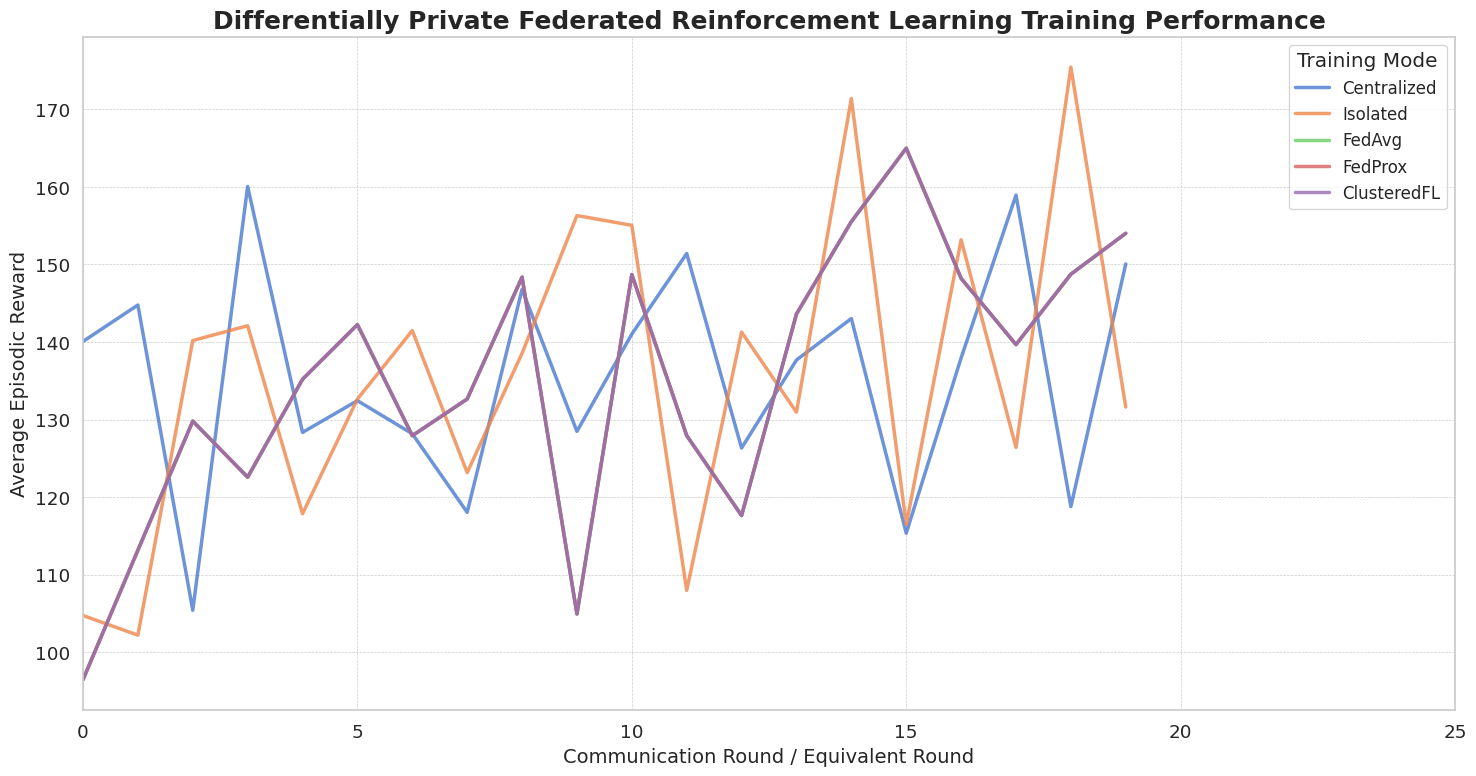

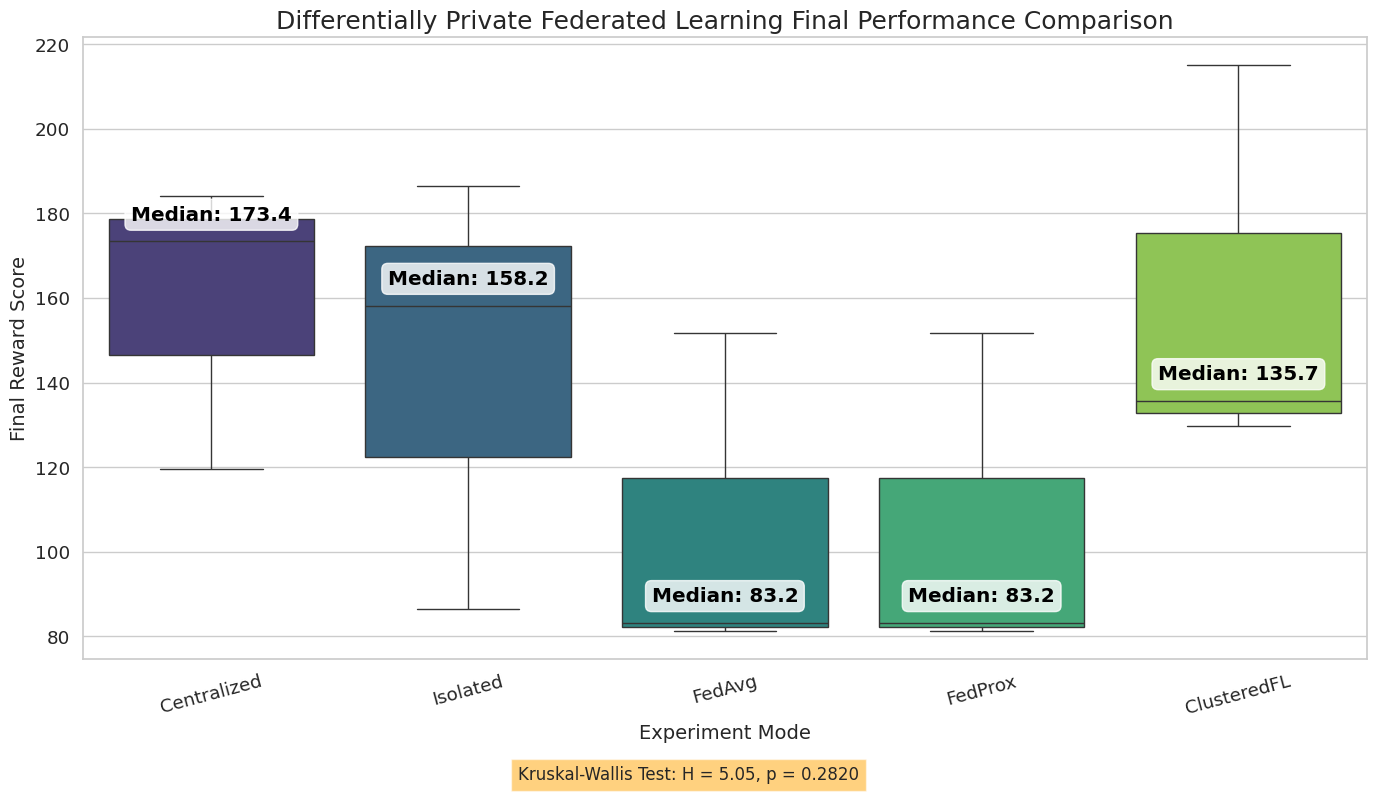

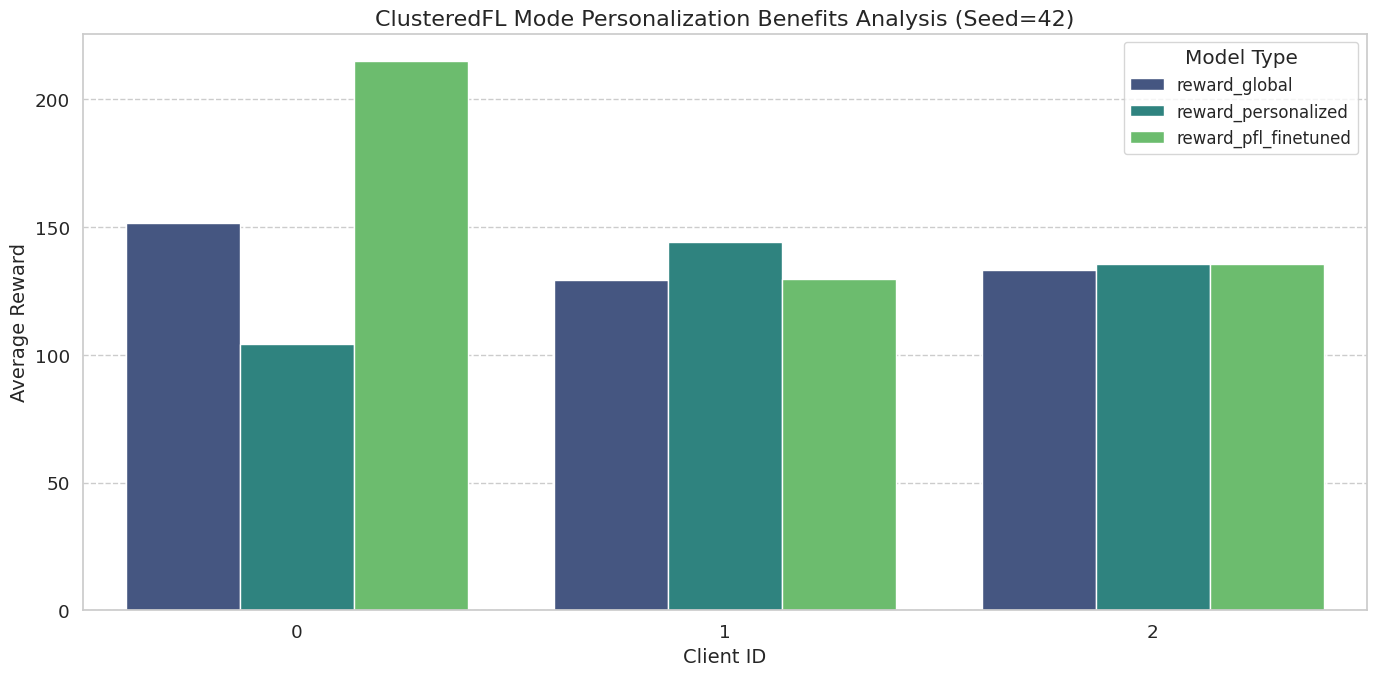

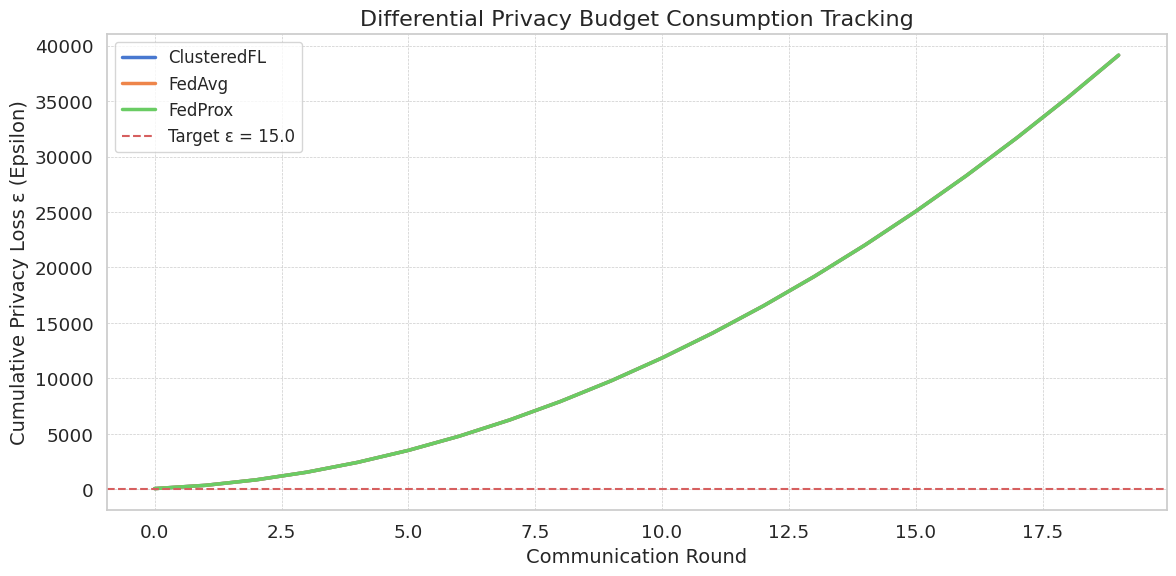

‚úÖ Cell 9: Results Visualization (English Version) completed.
üìÅ Figures saved to: /content/drive/MyDrive/FRL_Slicing_Sim/outputs_dp_final_stable/figures


In [9]:
# @title Cell 9: üìä ÁµêÊûúË¶ñË¶∫ÂåñÔºàËã±ÊñáÁâàÔºâ
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import json
import scipy.stats as stats
import numpy as np

def load_all_results(base_output_dir):
    all_evals, all_histories, all_privacies = [], [], []
    config_data = None

    if not os.path.exists(base_output_dir):
        print(f"‚ùå Results directory not found: {base_output_dir}")
        return pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), None

    # Try to load configuration files first
    config_files = glob.glob(os.path.join(base_output_dir, '**', '*_config.json'), recursive=True)
    if config_files:
        try:
            with open(config_files[0], 'r') as f:
                config_data = json.load(f)
        except Exception as e:
            print(f"üü° Warning: Failed to read config file: {e}")

    # List found files for debugging
    print(f"üîç Searching directory: {base_output_dir}")
    if os.path.exists(base_output_dir):
        print(f"üìÅ Found subdirectories:")
        for item in sorted(os.listdir(base_output_dir)):
            item_path = os.path.join(base_output_dir, item)
            if os.path.isdir(item_path):
                print(f"   üìÇ {item}")
                for subitem in sorted(os.listdir(item_path)):
                    subitem_path = os.path.join(item_path, subitem)
                    if os.path.isdir(subitem_path):
                        print(f"      üìÇ {subitem}")
                        csv_files = glob.glob(os.path.join(subitem_path, "*.csv"))
                        for csv_file in csv_files:
                            print(f"         üìÑ {os.path.basename(csv_file)}")

    for seed_folder in sorted(os.listdir(base_output_dir)):
        if not seed_folder.startswith('seed_'): continue
        try:
            seed = int(seed_folder.split('_')[1])
        except (ValueError, IndexError):
            continue

        for mode_folder in sorted(os.listdir(os.path.join(base_output_dir, seed_folder))):
            exp_path = os.path.join(base_output_dir, seed_folder, mode_folder)
            if not os.path.isdir(exp_path): continue

            eval_files = glob.glob(os.path.join(exp_path, '*_evaluation_results.csv'))
            history_files = glob.glob(os.path.join(exp_path, '*_training_history.csv'))
            privacy_files = glob.glob(os.path.join(exp_path, '*_privacy_costs.csv'))

            def read_and_append(file_list, data_list, mode_name, seed_val):
                if not file_list:
                    print(f"üü° Warning: No files found for {mode_name} (seed {seed_val})")
                    return
                file_path = file_list[0]
                try:
                    if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
                        df = pd.read_csv(file_path)
                        df['mode'] = mode_name
                        df['seed'] = seed_val
                        data_list.append(df)
                        print(f"‚úÖ Successfully loaded: {mode_name} (seed {seed_val}) - {len(df)} rows")
                    else:
                        print(f"üü° Warning: File is empty or doesn't exist: {file_path}")
                except Exception as e:
                    print(f"üü° Warning: Failed to read file: {file_path}, {e}")

            read_and_append(eval_files, all_evals, mode_folder, seed)
            read_and_append(history_files, all_histories, mode_folder, seed)
            read_and_append(privacy_files, all_privacies, mode_folder, seed)

    return (pd.concat(all_evals, ignore_index=True) if all_evals else pd.DataFrame()), \
           (pd.concat(all_histories, ignore_index=True) if all_histories else pd.DataFrame()), \
           (pd.concat(all_privacies, ignore_index=True) if all_privacies else pd.DataFrame()), \
           config_data

# --- Visualization Settings ---
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)
BASE_WORK_DIR = "/content/drive/MyDrive/FRL_Slicing_Sim"
BASE_OUTPUT_DIR = os.path.join(BASE_WORK_DIR, "outputs_dp_final_stable")  # Match Cell 8 path
FIGURES_OUTPUT_DIR = os.path.join(BASE_OUTPUT_DIR, "figures")
os.makedirs(FIGURES_OUTPUT_DIR, exist_ok=True)

print(f"üîç Loading results from: {BASE_OUTPUT_DIR}")
eval_df, history_df, privacy_df, loaded_config = load_all_results(BASE_OUTPUT_DIR)

if eval_df.empty and history_df.empty:
    print("‚ùå No result files found, cannot generate plots. Please ensure Cell 8 has completed successfully.")
    print(f"üìÅ Expected path: {BASE_OUTPUT_DIR}")
    print(f"üìÅ Path exists: {os.path.exists(BASE_OUTPUT_DIR)}")
else:
    # Corrected settings to match Cell 8
    SEEDS = [42]  # Only one seed
    mode_order = ["Centralized", "Isolated", "FedAvg", "FedProx", "ClusteredFL"]  # Removed Centralized

    print(f"‚úÖ Successfully loaded results from {len(eval_df['seed'].unique()) if not eval_df.empty else 0} runs.")
    if not eval_df.empty:
        print(f"üìä Found modes: {sorted(eval_df['mode'].unique())}")
        print(f"üìä Found seeds: {sorted(eval_df['seed'].unique())}")

    # --- Figure 1: Training History Comparison ---
    if not history_df.empty:
        plt.figure(figsize=(15, 8))

        # Only plot existing modes
        available_modes = [mode for mode in mode_order if mode in history_df['mode'].unique()]

        sns.lineplot(data=history_df, x='round', y='avg_reward', hue='mode',
                     hue_order=available_modes, errorbar=('sd', 1), linewidth=2.5,
                     err_style="band", alpha=0.8)

        plt.title('Differentially Private Federated Reinforcement Learning Training Performance', fontsize=18, weight='bold')
        plt.xlabel('Communication Round / Equivalent Round', fontsize=14)
        plt.ylabel('Average Episodic Reward', fontsize=14)
        plt.legend(title='Training Mode', fontsize=12)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.xlim(0, 25)
        plt.tight_layout()
        plt.savefig(os.path.join(FIGURES_OUTPUT_DIR, 'training_history_dp_eng.png'), dpi=300, bbox_inches='tight')
        plt.show()
    else:
        print("üü° Warning: No training history data found")

    # --- Figure 2: Final Performance Comparison ---
    if not eval_df.empty:
        eval_to_plot = eval_df.rename(columns={'reward_pfl_finetuned': 'Final Reward Score'})
        available_modes = [mode for mode in mode_order if mode in eval_to_plot['mode'].unique()]

        plt.figure(figsize=(14, 8))
        ax = sns.boxplot(data=eval_to_plot, x='mode', y='Final Reward Score',
                         order=available_modes, palette="viridis")

        # Add median annotations
        medians = eval_to_plot.groupby(['mode'])['Final Reward Score'].median().reindex(available_modes)
        for xtick in ax.get_xticks():
            if xtick < len(available_modes):
                mode_name = available_modes[xtick]
                median_val = medians.get(mode_name)
                if pd.notna(median_val):
                    ax.text(xtick, median_val + 5, f'Median: {median_val:.1f}',
                            horizontalalignment='center', size='medium',
                            color='black', weight='semibold',
                            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

        plt.title('Differentially Private Federated Learning Final Performance Comparison', fontsize=18)
        plt.xlabel('Experiment Mode', fontsize=14)
        plt.ylabel('Final Reward Score', fontsize=14)
        plt.xticks(rotation=15)

        # Statistical testing
        groups = [eval_to_plot['Final Reward Score'][eval_to_plot['mode'] == m].dropna()
                 for m in available_modes if m in eval_to_plot['mode'].unique()]
        if len(groups) > 1:
            h_stat, p_value = stats.kruskal(*groups)
            plt.figtext(0.5, 0.01, f'Kruskal-Wallis Test: H = {h_stat:.2f}, p = {p_value:.4f}',
                        ha='center', fontsize=12,
                        bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

        plt.tight_layout(rect=[0, 0.03, 1, 1])
        plt.savefig(os.path.join(FIGURES_OUTPUT_DIR, 'final_performance_dp_eng.png'), dpi=300, bbox_inches='tight')
        plt.show()
    else:
        print("üü° Warning: No evaluation results data found")

    # --- Figure 3: Personalization Benefit Analysis ---
    if not eval_df.empty:
        first_seed = SEEDS[0]
        # Prefer ClusteredFL, otherwise use the first available mode
        if 'ClusteredFL' in eval_df['mode'].unique():
            target_mode = 'ClusteredFL'
        else:
            target_mode = eval_df['mode'].unique()[0]

        target_eval = eval_df[(eval_df['mode'] == target_mode) & (eval_df['seed'] == first_seed)]

        if not target_eval.empty:
            target_melted = target_eval.melt(
                id_vars=['client_id'],
                value_vars=['reward_global', 'reward_personalized', 'reward_pfl_finetuned'],
                var_name='Model Type', value_name='Average Reward'
            )

            plt.figure(figsize=(14, 7))
            sns.barplot(data=target_melted, x='client_id', y='Average Reward',
                       hue='Model Type', palette='viridis')

            plt.title(f'{target_mode} Mode Personalization Benefits Analysis (Seed={first_seed})', fontsize=16)
            plt.xlabel('Client ID', fontsize=14)
            plt.ylabel('Average Reward', fontsize=14)
            plt.legend(title='Model Type', fontsize=12)
            plt.grid(axis='y', linestyle='--')
            plt.tight_layout()

            plt.savefig(os.path.join(FIGURES_OUTPUT_DIR, 'personalization_benefit_dp_eng.png'), dpi=300, bbox_inches='tight')
            plt.show()
        else:
            print(f"üü° Warning: No data found for {target_mode} mode")

    # --- Figure 4: Privacy Cost Tracking ---
    if not privacy_df.empty:
        privacy_to_plot = privacy_df[privacy_df['mode'].isin(['FedAvg', 'FedProx', 'ClusteredFL'])]

        if not privacy_to_plot.empty:
            plt.figure(figsize=(12, 6))
            sns.lineplot(data=privacy_to_plot, x='round', y='cumulative_epsilon', hue='mode',
                         errorbar=('sd', 1), linewidth=2.5)

            # Add target epsilon line
            if loaded_config and 'dp_target_epsilon' in loaded_config:
                target_eps = loaded_config['dp_target_epsilon']
                plt.axhline(y=target_eps, color='r', linestyle='--',
                           label=f'Target Œµ = {target_eps}')
            else:
                # If no config file, use Cell 8 default
                target_eps = 15.0
                plt.axhline(y=target_eps, color='r', linestyle='--',
                           label=f'Target Œµ = {target_eps}')

            plt.title('Differential Privacy Budget Consumption Tracking', fontsize=16)
            plt.xlabel('Communication Round', fontsize=14)
            plt.ylabel('Cumulative Privacy Loss Œµ (Epsilon)', fontsize=14)
            plt.legend(fontsize=12)
            plt.grid(True, which='both', linestyle='--', linewidth=0.5)
            plt.tight_layout()
            plt.savefig(os.path.join(FIGURES_OUTPUT_DIR, 'privacy_cost_dp_eng.png'), dpi=300, bbox_inches='tight')
            plt.show()
        else:
            print("üü° Warning: No privacy cost data found")
    else:
        print("üü° Warning: No privacy cost files found")

print("‚úÖ Cell 9: Results Visualization (English Version) completed.")
print(f"üìÅ Figures saved to: {FIGURES_OUTPUT_DIR}")


### Êé•‰∏ã‰æÜ
* Êì¥Â±ïÂÆ¢Êà∂Á´ØÊï∏ÈáèÁ†îÁ©∂